# 01 - Data Extraction Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile

import urllib, re
import bs4
import os

pd.set_option('display.max_columns', None)

In [2]:
with zipfile.ZipFile('../data/data.zip', 'r') as zip_ref:
    zip_ref.extractall('../data')

In [3]:
data_music = pd.read_csv('../data/data.csv')
data_music.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [7]:
data_genre = pd.read_csv('../data/data_w_genres.csv')
data_genre.head(20)

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.000000,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,38.200000,5,1,10,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,31.538462,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.571429,0,1,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.407407,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,42.000000,5,1,7,[]
5,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.591167,0.484333,218504.500000,0.300608,0.007042,0.176067,-18.579500,0.104958,122.517833,0.424500,33.166667,9,1,24,[]
6,"""Mama"" Helen Teagarden",0.725000,0.637000,135533.000000,0.512000,0.186000,0.426000,-20.615000,0.210000,134.819000,0.885000,0.000000,8,1,2,[]
7,"""Test for Victor Young""",0.927000,0.734000,175693.000000,0.474000,0.076200,0.737000,-10.544000,0.256000,132.788000,0.902000,3.000000,10,1,2,[]
8,"""Weird Al"" Yankovic",0.186821,0.650792,218352.962264,0.693189,0.000045,0.160926,-9.691151,0.082275,132.876604,0.764585,32.867925,9,1,106,"['comedy rock', 'comic', 'parody']"
9,$0dg0d,0.110000,0.732000,160171.000000,0.822000,0.000009,0.154000,-5.387000,0.155000,141.948000,0.740000,0.000000,7,0,2,[]


In [4]:
data_music.shape

(174389, 19)

In [5]:
data_music.id.nunique()

172230

Drop duplicates

In [6]:
data_no_dup = data_music.drop_duplicates()
print(f'We removed {data_music.shape[0] - data_no_dup.shape[0]} duplicated rows')

We removed 2159 duplicated rows


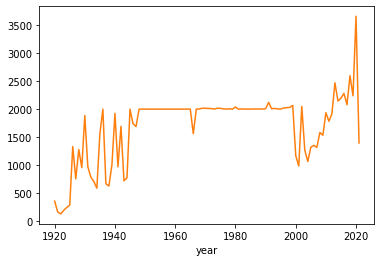

In [11]:
data_no_dup.groupby(['year'])['id'].count().plot(color = 'tab:orange')

No need to have really old songs. so I decided to filter out and use only data from 1980 upwards. 

I know I will miss several classics but it makes more sense for me to have more recent data. Also, it will make the computation times much faster 

In [13]:
data_filter = data_no_dup.loc[data_no_dup.year >= 1980].reset_index(drop=True)

total_filter = data_no_dup.shape[0] - data_filter.shape[0]
print(f"We have removed {total_filter} songs")
print(f"That represents {total_filter / data_no_dup.shape[0]:.2%} songs")


We have removed 91551 songs
That represents 53.16% songs


Using script for lyric extractor: https://github.com/rasbt/datacollect/tree/master/collect_lyrics

In [14]:
def lyricsmode(artist, title):
    artist = urllib.parse.quote(artist.lower().replace(' ','_'))
    title = urllib.parse.quote(title.lower().replace(' ','_'))

    try:
        url = 'http://www.lyricsmode.com/lyrics/%s/%s/%s.html' % (artist[0],artist, title)
        lyrics = urllib.request.urlopen(url)
    except:
        return 'Sorry, could not connect to lyricsmode.com.'
    text = lyrics.read()
    soup = bs4.BeautifulSoup(text)
    #lyricsmode places the lyrics in a span with an id of "lyrics"
    lyrics = soup.findAll(attrs= {'id' : 'lyrics_text'})
    if not lyrics:
        return 'Lyrics not found.'
    try:
        return re.sub('<[^<]+?>', '', ''.join(str(lyrics[0])))
    except:
        return 'Sorry, an error occurred while parsing the lyrics.'      
          

# testing connection    
if __name__ == '__main__':
    test = lyricsmode('Bob Dylan','Blowin in the wind')
    print(test)
    test2 = lyricsmode('Metallica','Enter Sandman')
    print(test2)


How many roads must a man walk down
Before you can call him a man?
How many seas must a white dove sail
Before she sleeps in the sand?
Yes, how many times must the cannon balls fly
Before they're forever banned?
The answer my friend is blowin' in the wind
The answer is blowin' in the wind.

Yes, how many years can a mountain exist
Before it's washed to the sea?
Yes, how many years can some people exist
Before they're allowed to be free?
Yes, how many times can a man turn his head
Pretending he just doesn't see?
The answer my friend is blowin' in the wind
The answer is blowin' in the wind.

Yes, how many times must a man look up
Before he can really see the sky?
Yes, how many ears must one man have
Before he can hear people cry?
Yes, how many deaths will it take till he knows
That too many people have died?
The answer my friend is blowin' in the wind
The answer is blowin' in the wind.                            
Explain
Request
 


×


 




 

                            [Verse 1]
Say

In [16]:
artists = list(data_filter.artists)
artist_search = []

for artist in artists:
    artist_search.append(artist[2:-2])

In [17]:
songs_search = list(data_filter.name)

print(f"The number of aritists is {len(artist_search)}")
print(f"The number of songs is {len(songs_search)}")

The number of aritists is 80679
The number of songs is 80679


Get lyrics

In [18]:
lyrics = []
i = 0
for artist, song in zip(artist_search, songs_search):
    print(f"{len(artist_search)-i} songs missing")
    try:
        lyric = lyricsmode(artist, song)
        lyrics.append(lyric)
        
    except:
        v.append("ERROR")
    
    i += 1

80679 songs missing
80678 songs missing
80677 songs missing
80676 songs missing
80675 songs missing
80674 songs missing
80673 songs missing
80672 songs missing
80671 songs missing
80670 songs missing
80669 songs missing
80668 songs missing
80667 songs missing
80666 songs missing
80665 songs missing
80664 songs missing
80663 songs missing
80662 songs missing
80661 songs missing
80660 songs missing
80659 songs missing
80658 songs missing
80657 songs missing
80656 songs missing
80655 songs missing
80654 songs missing
80653 songs missing
80652 songs missing
80651 songs missing
80650 songs missing
80649 songs missing
80648 songs missing
80647 songs missing
80646 songs missing
80645 songs missing
80644 songs missing
80643 songs missing
80642 songs missing
80641 songs missing
80640 songs missing
80639 songs missing
80638 songs missing
80637 songs missing
80636 songs missing
80635 songs missing
80634 songs missing
80633 songs missing
80632 songs missing
80631 songs missing
80630 songs missing


80269 songs missing
80268 songs missing
80267 songs missing
80266 songs missing
80265 songs missing
80264 songs missing
80263 songs missing
80262 songs missing
80261 songs missing
80260 songs missing
80259 songs missing
80258 songs missing
80257 songs missing
80256 songs missing
80255 songs missing
80254 songs missing
80253 songs missing
80252 songs missing
80251 songs missing
80250 songs missing
80249 songs missing
80248 songs missing
80247 songs missing
80246 songs missing
80245 songs missing
80244 songs missing
80243 songs missing
80242 songs missing
80241 songs missing
80240 songs missing
80239 songs missing
80238 songs missing
80237 songs missing
80236 songs missing
80235 songs missing
80234 songs missing
80233 songs missing
80232 songs missing
80231 songs missing
80230 songs missing
80229 songs missing
80228 songs missing
80227 songs missing
80226 songs missing
80225 songs missing
80224 songs missing
80223 songs missing
80222 songs missing
80221 songs missing
80220 songs missing


79859 songs missing
79858 songs missing
79857 songs missing
79856 songs missing
79855 songs missing
79854 songs missing
79853 songs missing
79852 songs missing
79851 songs missing
79850 songs missing
79849 songs missing
79848 songs missing
79847 songs missing
79846 songs missing
79845 songs missing
79844 songs missing
79843 songs missing
79842 songs missing
79841 songs missing
79840 songs missing
79839 songs missing
79838 songs missing
79837 songs missing
79836 songs missing
79835 songs missing
79834 songs missing
79833 songs missing
79832 songs missing
79831 songs missing
79830 songs missing
79829 songs missing
79828 songs missing
79827 songs missing
79826 songs missing
79825 songs missing
79824 songs missing
79823 songs missing
79822 songs missing
79821 songs missing
79820 songs missing
79819 songs missing
79818 songs missing
79817 songs missing
79816 songs missing
79815 songs missing
79814 songs missing
79813 songs missing
79812 songs missing
79811 songs missing
79810 songs missing


79449 songs missing
79448 songs missing
79447 songs missing
79446 songs missing
79445 songs missing
79444 songs missing
79443 songs missing
79442 songs missing
79441 songs missing
79440 songs missing
79439 songs missing
79438 songs missing
79437 songs missing
79436 songs missing
79435 songs missing
79434 songs missing
79433 songs missing
79432 songs missing
79431 songs missing
79430 songs missing
79429 songs missing
79428 songs missing
79427 songs missing
79426 songs missing
79425 songs missing
79424 songs missing
79423 songs missing
79422 songs missing
79421 songs missing
79420 songs missing
79419 songs missing
79418 songs missing
79417 songs missing
79416 songs missing
79415 songs missing
79414 songs missing
79413 songs missing
79412 songs missing
79411 songs missing
79410 songs missing
79409 songs missing
79408 songs missing
79407 songs missing
79406 songs missing
79405 songs missing
79404 songs missing
79403 songs missing
79402 songs missing
79401 songs missing
79400 songs missing


79038 songs missing
79037 songs missing
79036 songs missing
79035 songs missing
79034 songs missing
79033 songs missing
79032 songs missing
79031 songs missing
79030 songs missing
79029 songs missing
79028 songs missing
79027 songs missing
79026 songs missing
79025 songs missing
79024 songs missing
79023 songs missing
79022 songs missing
79021 songs missing
79020 songs missing
79019 songs missing
79018 songs missing
79017 songs missing
79016 songs missing
79015 songs missing
79014 songs missing
79013 songs missing
79012 songs missing
79011 songs missing
79010 songs missing
79009 songs missing
79008 songs missing
79007 songs missing
79006 songs missing
79005 songs missing
79004 songs missing
79003 songs missing
79002 songs missing
79001 songs missing
79000 songs missing
78999 songs missing
78998 songs missing
78997 songs missing
78996 songs missing
78995 songs missing
78994 songs missing
78993 songs missing
78992 songs missing
78991 songs missing
78990 songs missing
78989 songs missing


78628 songs missing
78627 songs missing
78626 songs missing
78625 songs missing
78624 songs missing
78623 songs missing
78622 songs missing
78621 songs missing
78620 songs missing
78619 songs missing
78618 songs missing
78617 songs missing
78616 songs missing
78615 songs missing
78614 songs missing
78613 songs missing
78612 songs missing
78611 songs missing
78610 songs missing
78609 songs missing
78608 songs missing
78607 songs missing
78606 songs missing
78605 songs missing
78604 songs missing
78603 songs missing
78602 songs missing
78601 songs missing
78600 songs missing
78599 songs missing
78598 songs missing
78597 songs missing
78596 songs missing
78595 songs missing
78594 songs missing
78593 songs missing
78592 songs missing
78591 songs missing
78590 songs missing
78589 songs missing
78588 songs missing
78587 songs missing
78586 songs missing
78585 songs missing
78584 songs missing
78583 songs missing
78582 songs missing
78581 songs missing
78580 songs missing
78579 songs missing


78218 songs missing
78217 songs missing
78216 songs missing
78215 songs missing
78214 songs missing
78213 songs missing
78212 songs missing
78211 songs missing
78210 songs missing
78209 songs missing
78208 songs missing
78207 songs missing
78206 songs missing
78205 songs missing
78204 songs missing
78203 songs missing
78202 songs missing
78201 songs missing
78200 songs missing
78199 songs missing
78198 songs missing
78197 songs missing
78196 songs missing
78195 songs missing
78194 songs missing
78193 songs missing
78192 songs missing
78191 songs missing
78190 songs missing
78189 songs missing
78188 songs missing
78187 songs missing
78186 songs missing
78185 songs missing
78184 songs missing
78183 songs missing
78182 songs missing
78181 songs missing
78180 songs missing
78179 songs missing
78178 songs missing
78177 songs missing
78176 songs missing
78175 songs missing
78174 songs missing
78173 songs missing
78172 songs missing
78171 songs missing
78170 songs missing
78169 songs missing


77808 songs missing
77807 songs missing
77806 songs missing
77805 songs missing
77804 songs missing
77803 songs missing
77802 songs missing
77801 songs missing
77800 songs missing
77799 songs missing
77798 songs missing
77797 songs missing
77796 songs missing
77795 songs missing
77794 songs missing
77793 songs missing
77792 songs missing
77791 songs missing
77790 songs missing
77789 songs missing
77788 songs missing
77787 songs missing
77786 songs missing
77785 songs missing
77784 songs missing
77783 songs missing
77782 songs missing
77781 songs missing
77780 songs missing
77779 songs missing
77778 songs missing
77777 songs missing
77776 songs missing
77775 songs missing
77774 songs missing
77773 songs missing
77772 songs missing
77771 songs missing
77770 songs missing
77769 songs missing
77768 songs missing
77767 songs missing
77766 songs missing
77765 songs missing
77764 songs missing
77763 songs missing
77762 songs missing
77761 songs missing
77760 songs missing
77759 songs missing


77398 songs missing
77397 songs missing
77396 songs missing
77395 songs missing
77394 songs missing
77393 songs missing
77392 songs missing
77391 songs missing
77390 songs missing
77389 songs missing
77388 songs missing
77387 songs missing
77386 songs missing
77385 songs missing
77384 songs missing
77383 songs missing
77382 songs missing
77381 songs missing
77380 songs missing
77379 songs missing
77378 songs missing
77377 songs missing
77376 songs missing
77375 songs missing
77374 songs missing
77373 songs missing
77372 songs missing
77371 songs missing
77370 songs missing
77369 songs missing
77368 songs missing
77367 songs missing
77366 songs missing
77365 songs missing
77364 songs missing
77363 songs missing
77362 songs missing
77361 songs missing
77360 songs missing
77359 songs missing
77358 songs missing
77357 songs missing
77356 songs missing
77355 songs missing
77354 songs missing
77353 songs missing
77352 songs missing
77351 songs missing
77350 songs missing
77349 songs missing


76988 songs missing
76987 songs missing
76986 songs missing
76985 songs missing
76984 songs missing
76983 songs missing
76982 songs missing
76981 songs missing
76980 songs missing
76979 songs missing
76978 songs missing
76977 songs missing
76976 songs missing
76975 songs missing
76974 songs missing
76973 songs missing
76972 songs missing
76971 songs missing
76970 songs missing
76969 songs missing
76968 songs missing
76967 songs missing
76966 songs missing
76965 songs missing
76964 songs missing
76963 songs missing
76962 songs missing
76961 songs missing
76960 songs missing
76959 songs missing
76958 songs missing
76957 songs missing
76956 songs missing
76955 songs missing
76954 songs missing
76953 songs missing
76952 songs missing
76951 songs missing
76950 songs missing
76949 songs missing
76948 songs missing
76947 songs missing
76946 songs missing
76945 songs missing
76944 songs missing
76943 songs missing
76942 songs missing
76941 songs missing
76940 songs missing
76939 songs missing


76578 songs missing
76577 songs missing
76576 songs missing
76575 songs missing
76574 songs missing
76573 songs missing
76572 songs missing
76571 songs missing
76570 songs missing
76569 songs missing
76568 songs missing
76567 songs missing
76566 songs missing
76565 songs missing
76564 songs missing
76563 songs missing
76562 songs missing
76561 songs missing
76560 songs missing
76559 songs missing
76558 songs missing
76557 songs missing
76556 songs missing
76555 songs missing
76554 songs missing
76553 songs missing
76552 songs missing
76551 songs missing
76550 songs missing
76549 songs missing
76548 songs missing
76547 songs missing
76546 songs missing
76545 songs missing
76544 songs missing
76543 songs missing
76542 songs missing
76541 songs missing
76540 songs missing
76539 songs missing
76538 songs missing
76537 songs missing
76536 songs missing
76535 songs missing
76534 songs missing
76533 songs missing
76532 songs missing
76531 songs missing
76530 songs missing
76529 songs missing


76168 songs missing
76167 songs missing
76166 songs missing
76165 songs missing
76164 songs missing
76163 songs missing
76162 songs missing
76161 songs missing
76160 songs missing
76159 songs missing
76158 songs missing
76157 songs missing
76156 songs missing
76155 songs missing
76154 songs missing
76153 songs missing
76152 songs missing
76151 songs missing
76150 songs missing
76149 songs missing
76148 songs missing
76147 songs missing
76146 songs missing
76145 songs missing
76144 songs missing
76143 songs missing
76142 songs missing
76141 songs missing
76140 songs missing
76139 songs missing
76138 songs missing
76137 songs missing
76136 songs missing
76135 songs missing
76134 songs missing
76133 songs missing
76132 songs missing
76131 songs missing
76130 songs missing
76129 songs missing
76128 songs missing
76127 songs missing
76126 songs missing
76125 songs missing
76124 songs missing
76123 songs missing
76122 songs missing
76121 songs missing
76120 songs missing
76119 songs missing


75758 songs missing
75757 songs missing
75756 songs missing
75755 songs missing
75754 songs missing
75753 songs missing
75752 songs missing
75751 songs missing
75750 songs missing
75749 songs missing
75748 songs missing
75747 songs missing
75746 songs missing
75745 songs missing
75744 songs missing
75743 songs missing
75742 songs missing
75741 songs missing
75740 songs missing
75739 songs missing
75738 songs missing
75737 songs missing
75736 songs missing
75735 songs missing
75734 songs missing
75733 songs missing
75732 songs missing
75731 songs missing
75730 songs missing
75729 songs missing
75728 songs missing
75727 songs missing
75726 songs missing
75725 songs missing
75724 songs missing
75723 songs missing
75722 songs missing
75721 songs missing
75720 songs missing
75719 songs missing
75718 songs missing
75717 songs missing
75716 songs missing
75715 songs missing
75714 songs missing
75713 songs missing
75712 songs missing
75711 songs missing
75710 songs missing
75709 songs missing


75348 songs missing
75347 songs missing
75346 songs missing
75345 songs missing
75344 songs missing
75343 songs missing
75342 songs missing
75341 songs missing
75340 songs missing
75339 songs missing
75338 songs missing
75337 songs missing
75336 songs missing
75335 songs missing
75334 songs missing
75333 songs missing
75332 songs missing
75331 songs missing
75330 songs missing
75329 songs missing
75328 songs missing
75327 songs missing
75326 songs missing
75325 songs missing
75324 songs missing
75323 songs missing
75322 songs missing
75321 songs missing
75320 songs missing
75319 songs missing
75318 songs missing
75317 songs missing
75316 songs missing
75315 songs missing
75314 songs missing
75313 songs missing
75312 songs missing
75311 songs missing
75310 songs missing
75309 songs missing
75308 songs missing
75307 songs missing
75306 songs missing
75305 songs missing
75304 songs missing
75303 songs missing
75302 songs missing
75301 songs missing
75300 songs missing
75299 songs missing


74938 songs missing
74937 songs missing
74936 songs missing
74935 songs missing
74934 songs missing
74933 songs missing
74932 songs missing
74931 songs missing
74930 songs missing
74929 songs missing
74928 songs missing
74927 songs missing
74926 songs missing
74925 songs missing
74924 songs missing
74923 songs missing
74922 songs missing
74921 songs missing
74920 songs missing
74919 songs missing
74918 songs missing
74917 songs missing
74916 songs missing
74915 songs missing
74914 songs missing
74913 songs missing
74912 songs missing
74911 songs missing
74910 songs missing
74909 songs missing
74908 songs missing
74907 songs missing
74906 songs missing
74905 songs missing
74904 songs missing
74903 songs missing
74902 songs missing
74901 songs missing
74900 songs missing
74899 songs missing
74898 songs missing
74897 songs missing
74896 songs missing
74895 songs missing
74894 songs missing
74893 songs missing
74892 songs missing
74891 songs missing
74890 songs missing
74889 songs missing


74528 songs missing
74527 songs missing
74526 songs missing
74525 songs missing
74524 songs missing
74523 songs missing
74522 songs missing
74521 songs missing
74520 songs missing
74519 songs missing
74518 songs missing
74517 songs missing
74516 songs missing
74515 songs missing
74514 songs missing
74513 songs missing
74512 songs missing
74511 songs missing
74510 songs missing
74509 songs missing
74508 songs missing
74507 songs missing
74506 songs missing
74505 songs missing
74504 songs missing
74503 songs missing
74502 songs missing
74501 songs missing
74500 songs missing
74499 songs missing
74498 songs missing
74497 songs missing
74496 songs missing
74495 songs missing
74494 songs missing
74493 songs missing
74492 songs missing
74491 songs missing
74490 songs missing
74489 songs missing
74488 songs missing
74487 songs missing
74486 songs missing
74485 songs missing
74484 songs missing
74483 songs missing
74482 songs missing
74481 songs missing
74480 songs missing
74479 songs missing


74118 songs missing
74117 songs missing
74116 songs missing
74115 songs missing
74114 songs missing
74113 songs missing
74112 songs missing
74111 songs missing
74110 songs missing
74109 songs missing
74108 songs missing
74107 songs missing
74106 songs missing
74105 songs missing
74104 songs missing
74103 songs missing
74102 songs missing
74101 songs missing
74100 songs missing
74099 songs missing
74098 songs missing
74097 songs missing
74096 songs missing
74095 songs missing
74094 songs missing
74093 songs missing
74092 songs missing
74091 songs missing
74090 songs missing
74089 songs missing
74088 songs missing
74087 songs missing
74086 songs missing
74085 songs missing
74084 songs missing
74083 songs missing
74082 songs missing
74081 songs missing
74080 songs missing
74079 songs missing
74078 songs missing
74077 songs missing
74076 songs missing
74075 songs missing
74074 songs missing
74073 songs missing
74072 songs missing
74071 songs missing
74070 songs missing
74069 songs missing


73708 songs missing
73707 songs missing
73706 songs missing
73705 songs missing
73704 songs missing
73703 songs missing
73702 songs missing
73701 songs missing
73700 songs missing
73699 songs missing
73698 songs missing
73697 songs missing
73696 songs missing
73695 songs missing
73694 songs missing
73693 songs missing
73692 songs missing
73691 songs missing
73690 songs missing
73689 songs missing
73688 songs missing
73687 songs missing
73686 songs missing
73685 songs missing
73684 songs missing
73683 songs missing
73682 songs missing
73681 songs missing
73680 songs missing
73679 songs missing
73678 songs missing
73677 songs missing
73676 songs missing
73675 songs missing
73674 songs missing
73673 songs missing
73672 songs missing
73671 songs missing
73670 songs missing
73669 songs missing
73668 songs missing
73667 songs missing
73666 songs missing
73665 songs missing
73664 songs missing
73663 songs missing
73662 songs missing
73661 songs missing
73660 songs missing
73659 songs missing


72889 songs missing
72888 songs missing
72887 songs missing
72886 songs missing
72885 songs missing
72884 songs missing
72883 songs missing
72882 songs missing
72881 songs missing
72880 songs missing
72879 songs missing
72878 songs missing
72877 songs missing
72876 songs missing
72875 songs missing
72874 songs missing
72873 songs missing
72872 songs missing
72871 songs missing
72870 songs missing
72869 songs missing
72868 songs missing
72867 songs missing
72866 songs missing
72865 songs missing
72864 songs missing
72863 songs missing
72862 songs missing
72861 songs missing
72860 songs missing
72859 songs missing
72858 songs missing
72857 songs missing
72856 songs missing
72855 songs missing
72854 songs missing
72853 songs missing
72852 songs missing
72851 songs missing
72850 songs missing
72849 songs missing
72848 songs missing
72847 songs missing
72846 songs missing
72845 songs missing
72844 songs missing
72843 songs missing
72842 songs missing
72841 songs missing
72840 songs missing


72479 songs missing
72478 songs missing
72477 songs missing
72476 songs missing
72475 songs missing
72474 songs missing
72473 songs missing
72472 songs missing
72471 songs missing
72470 songs missing
72469 songs missing
72468 songs missing
72467 songs missing
72466 songs missing
72465 songs missing
72464 songs missing
72463 songs missing
72462 songs missing
72461 songs missing
72460 songs missing
72459 songs missing
72458 songs missing
72457 songs missing
72456 songs missing
72455 songs missing
72454 songs missing
72453 songs missing
72452 songs missing
72451 songs missing
72450 songs missing
72449 songs missing
72448 songs missing
72447 songs missing
72446 songs missing
72445 songs missing
72444 songs missing
72443 songs missing
72442 songs missing
72441 songs missing
72440 songs missing
72439 songs missing
72438 songs missing
72437 songs missing
72436 songs missing
72435 songs missing
72434 songs missing
72433 songs missing
72432 songs missing
72431 songs missing
72430 songs missing


72069 songs missing
72068 songs missing
72067 songs missing
72066 songs missing
72065 songs missing
72064 songs missing
72063 songs missing
72062 songs missing
72061 songs missing
72060 songs missing
72059 songs missing
72058 songs missing
72057 songs missing
72056 songs missing
72055 songs missing
72054 songs missing
72053 songs missing
72052 songs missing
72051 songs missing
72050 songs missing
72049 songs missing
72048 songs missing
72047 songs missing
72046 songs missing
72045 songs missing
72044 songs missing
72043 songs missing
72042 songs missing
72041 songs missing
72040 songs missing
72039 songs missing
72038 songs missing
72037 songs missing
72036 songs missing
72035 songs missing
72034 songs missing
72033 songs missing
72032 songs missing
72031 songs missing
72030 songs missing
72029 songs missing
72028 songs missing
72027 songs missing
72026 songs missing
72025 songs missing
72024 songs missing
72023 songs missing
72022 songs missing
72021 songs missing
72020 songs missing


71659 songs missing
71658 songs missing
71657 songs missing
71656 songs missing
71655 songs missing
71654 songs missing
71653 songs missing
71652 songs missing
71651 songs missing
71650 songs missing
71649 songs missing
71648 songs missing
71647 songs missing
71646 songs missing
71645 songs missing
71644 songs missing
71643 songs missing
71642 songs missing
71641 songs missing
71640 songs missing
71639 songs missing
71638 songs missing
71637 songs missing
71636 songs missing
71635 songs missing
71634 songs missing
71633 songs missing
71632 songs missing
71631 songs missing
71630 songs missing
71629 songs missing
71628 songs missing
71627 songs missing
71626 songs missing
71625 songs missing
71624 songs missing
71623 songs missing
71622 songs missing
71621 songs missing
71620 songs missing
71619 songs missing
71618 songs missing
71617 songs missing
71616 songs missing
71615 songs missing
71614 songs missing
71613 songs missing
71612 songs missing
71611 songs missing
71610 songs missing


71249 songs missing
71248 songs missing
71247 songs missing
71246 songs missing
71245 songs missing
71244 songs missing
71243 songs missing
71242 songs missing
71241 songs missing
71240 songs missing
71239 songs missing
71238 songs missing
71237 songs missing
71236 songs missing
71235 songs missing
71234 songs missing
71233 songs missing
71232 songs missing
71231 songs missing
71230 songs missing
71229 songs missing
71228 songs missing
71227 songs missing
71226 songs missing
71225 songs missing
71224 songs missing
71223 songs missing
71222 songs missing
71221 songs missing
71220 songs missing
71219 songs missing
71218 songs missing
71217 songs missing
71216 songs missing
71215 songs missing
71214 songs missing
71213 songs missing
71212 songs missing
71211 songs missing
71210 songs missing
71209 songs missing
71208 songs missing
71207 songs missing
71206 songs missing
71205 songs missing
71204 songs missing
71203 songs missing
71202 songs missing
71201 songs missing
71200 songs missing


70839 songs missing
70838 songs missing
70837 songs missing
70836 songs missing
70835 songs missing
70834 songs missing
70833 songs missing
70832 songs missing
70831 songs missing
70830 songs missing
70829 songs missing
70828 songs missing
70827 songs missing
70826 songs missing
70825 songs missing
70824 songs missing
70823 songs missing
70822 songs missing
70821 songs missing
70820 songs missing
70819 songs missing
70818 songs missing
70817 songs missing
70816 songs missing
70815 songs missing
70814 songs missing
70813 songs missing
70812 songs missing
70811 songs missing
70810 songs missing
70809 songs missing
70808 songs missing
70807 songs missing
70806 songs missing
70805 songs missing
70804 songs missing
70803 songs missing
70802 songs missing
70801 songs missing
70800 songs missing
70799 songs missing
70798 songs missing
70797 songs missing
70796 songs missing
70795 songs missing
70794 songs missing
70793 songs missing
70792 songs missing
70791 songs missing
70790 songs missing


70429 songs missing
70428 songs missing
70427 songs missing
70426 songs missing
70425 songs missing
70424 songs missing
70423 songs missing
70422 songs missing
70421 songs missing
70420 songs missing
70419 songs missing
70418 songs missing
70417 songs missing
70416 songs missing
70415 songs missing
70414 songs missing
70413 songs missing
70412 songs missing
70411 songs missing
70410 songs missing
70409 songs missing
70408 songs missing
70407 songs missing
70406 songs missing
70405 songs missing
70404 songs missing
70403 songs missing
70402 songs missing
70401 songs missing
70400 songs missing
70399 songs missing
70398 songs missing
70397 songs missing
70396 songs missing
70395 songs missing
70394 songs missing
70393 songs missing
70392 songs missing
70391 songs missing
70390 songs missing
70389 songs missing
70388 songs missing
70387 songs missing
70386 songs missing
70385 songs missing
70384 songs missing
70383 songs missing
70382 songs missing
70381 songs missing
70380 songs missing


70019 songs missing
70018 songs missing
70017 songs missing
70016 songs missing
70015 songs missing
70014 songs missing
70013 songs missing
70012 songs missing
70011 songs missing
70010 songs missing
70009 songs missing
70008 songs missing
70007 songs missing
70006 songs missing
70005 songs missing
70004 songs missing
70003 songs missing
70002 songs missing
70001 songs missing
70000 songs missing
69999 songs missing
69998 songs missing
69997 songs missing
69996 songs missing
69995 songs missing
69994 songs missing
69993 songs missing
69992 songs missing
69991 songs missing
69990 songs missing
69989 songs missing
69988 songs missing
69987 songs missing
69986 songs missing
69985 songs missing
69984 songs missing
69983 songs missing
69982 songs missing
69981 songs missing
69980 songs missing
69979 songs missing
69978 songs missing
69977 songs missing
69976 songs missing
69975 songs missing
69974 songs missing
69973 songs missing
69972 songs missing
69971 songs missing
69970 songs missing


69609 songs missing
69608 songs missing
69607 songs missing
69606 songs missing
69605 songs missing
69604 songs missing
69603 songs missing
69602 songs missing
69601 songs missing
69600 songs missing
69599 songs missing
69598 songs missing
69597 songs missing
69596 songs missing
69595 songs missing
69594 songs missing
69593 songs missing
69592 songs missing
69591 songs missing
69590 songs missing
69589 songs missing
69588 songs missing
69587 songs missing
69586 songs missing
69585 songs missing
69584 songs missing
69583 songs missing
69582 songs missing
69581 songs missing
69580 songs missing
69579 songs missing
69578 songs missing
69577 songs missing
69576 songs missing
69575 songs missing
69574 songs missing
69573 songs missing
69572 songs missing
69571 songs missing
69570 songs missing
69569 songs missing
69568 songs missing
69567 songs missing
69566 songs missing
69565 songs missing
69564 songs missing
69563 songs missing
69562 songs missing
69561 songs missing
69560 songs missing


69199 songs missing
69198 songs missing
69197 songs missing
69196 songs missing
69195 songs missing
69194 songs missing
69193 songs missing
69192 songs missing
69191 songs missing
69190 songs missing
69189 songs missing
69188 songs missing
69187 songs missing
69186 songs missing
69185 songs missing
69184 songs missing
69183 songs missing
69182 songs missing
69181 songs missing
69180 songs missing
69179 songs missing
69178 songs missing
69177 songs missing
69176 songs missing
69175 songs missing
69174 songs missing
69173 songs missing
69172 songs missing
69171 songs missing
69170 songs missing
69169 songs missing
69168 songs missing
69167 songs missing
69166 songs missing
69165 songs missing
69164 songs missing
69163 songs missing
69162 songs missing
69161 songs missing
69160 songs missing
69159 songs missing
69158 songs missing
69157 songs missing
69156 songs missing
69155 songs missing
69154 songs missing
69153 songs missing
69152 songs missing
69151 songs missing
69150 songs missing


68789 songs missing
68788 songs missing
68787 songs missing
68786 songs missing
68785 songs missing
68784 songs missing
68783 songs missing
68782 songs missing
68781 songs missing
68780 songs missing
68779 songs missing
68778 songs missing
68777 songs missing
68776 songs missing
68775 songs missing
68774 songs missing
68773 songs missing
68772 songs missing
68771 songs missing
68770 songs missing
68769 songs missing
68768 songs missing
68767 songs missing
68766 songs missing
68765 songs missing
68764 songs missing
68763 songs missing
68762 songs missing
68761 songs missing
68760 songs missing
68759 songs missing
68758 songs missing
68757 songs missing
68756 songs missing
68755 songs missing
68754 songs missing
68753 songs missing
68752 songs missing
68751 songs missing
68750 songs missing
68749 songs missing
68748 songs missing
68747 songs missing
68746 songs missing
68745 songs missing
68744 songs missing
68743 songs missing
68742 songs missing
68741 songs missing
68740 songs missing


68379 songs missing
68378 songs missing
68377 songs missing
68376 songs missing
68375 songs missing
68374 songs missing
68373 songs missing
68372 songs missing
68371 songs missing
68370 songs missing
68369 songs missing
68368 songs missing
68367 songs missing
68366 songs missing
68365 songs missing
68364 songs missing
68363 songs missing
68362 songs missing
68361 songs missing
68360 songs missing
68359 songs missing
68358 songs missing
68357 songs missing
68356 songs missing
68355 songs missing
68354 songs missing
68353 songs missing
68352 songs missing
68351 songs missing
68350 songs missing
68349 songs missing
68348 songs missing
68347 songs missing
68346 songs missing
68345 songs missing
68344 songs missing
68343 songs missing
68342 songs missing
68341 songs missing
68340 songs missing
68339 songs missing
68338 songs missing
68337 songs missing
68336 songs missing
68335 songs missing
68334 songs missing
68333 songs missing
68332 songs missing
68331 songs missing
68330 songs missing


67969 songs missing
67968 songs missing
67967 songs missing
67966 songs missing
67965 songs missing
67964 songs missing
67963 songs missing
67962 songs missing
67961 songs missing
67960 songs missing
67959 songs missing
67958 songs missing
67957 songs missing
67956 songs missing
67955 songs missing
67954 songs missing
67953 songs missing
67952 songs missing
67951 songs missing
67950 songs missing
67949 songs missing
67948 songs missing
67947 songs missing
67946 songs missing
67945 songs missing
67944 songs missing
67943 songs missing
67942 songs missing
67941 songs missing
67940 songs missing
67939 songs missing
67938 songs missing
67937 songs missing
67936 songs missing
67935 songs missing
67934 songs missing
67933 songs missing
67932 songs missing
67931 songs missing
67930 songs missing
67929 songs missing
67928 songs missing
67927 songs missing
67926 songs missing
67925 songs missing
67924 songs missing
67923 songs missing
67922 songs missing
67921 songs missing
67920 songs missing


67559 songs missing
67558 songs missing
67557 songs missing
67556 songs missing
67555 songs missing
67554 songs missing
67553 songs missing
67552 songs missing
67551 songs missing
67550 songs missing
67549 songs missing
67548 songs missing
67547 songs missing
67546 songs missing
67545 songs missing
67544 songs missing
67543 songs missing
67542 songs missing
67541 songs missing
67540 songs missing
67539 songs missing
67538 songs missing
67537 songs missing
67536 songs missing
67535 songs missing
67534 songs missing
67533 songs missing
67532 songs missing
67531 songs missing
67530 songs missing
67529 songs missing
67528 songs missing
67527 songs missing
67526 songs missing
67525 songs missing
67524 songs missing
67523 songs missing
67522 songs missing
67521 songs missing
67520 songs missing
67519 songs missing
67518 songs missing
67517 songs missing
67516 songs missing
67515 songs missing
67514 songs missing
67513 songs missing
67512 songs missing
67511 songs missing
67510 songs missing


67149 songs missing
67148 songs missing
67147 songs missing
67146 songs missing
67145 songs missing
67144 songs missing
67143 songs missing
67142 songs missing
67141 songs missing
67140 songs missing
67139 songs missing
67138 songs missing
67137 songs missing
67136 songs missing
67135 songs missing
67134 songs missing
67133 songs missing
67132 songs missing
67131 songs missing
67130 songs missing
67129 songs missing
67128 songs missing
67127 songs missing
67126 songs missing
67125 songs missing
67124 songs missing
67123 songs missing
67122 songs missing
67121 songs missing
67120 songs missing
67119 songs missing
67118 songs missing
67117 songs missing
67116 songs missing
67115 songs missing
67114 songs missing
67113 songs missing
67112 songs missing
67111 songs missing
67110 songs missing
67109 songs missing
67108 songs missing
67107 songs missing
67106 songs missing
67105 songs missing
67104 songs missing
67103 songs missing
67102 songs missing
67101 songs missing
67100 songs missing


66739 songs missing
66738 songs missing
66737 songs missing
66736 songs missing
66735 songs missing
66734 songs missing
66733 songs missing
66732 songs missing
66731 songs missing
66730 songs missing
66729 songs missing
66728 songs missing
66727 songs missing
66726 songs missing
66725 songs missing
66724 songs missing
66723 songs missing
66722 songs missing
66721 songs missing
66720 songs missing
66719 songs missing
66718 songs missing
66717 songs missing
66716 songs missing
66715 songs missing
66714 songs missing
66713 songs missing
66712 songs missing
66711 songs missing
66710 songs missing
66709 songs missing
66708 songs missing
66707 songs missing
66706 songs missing
66705 songs missing
66704 songs missing
66703 songs missing
66702 songs missing
66701 songs missing
66700 songs missing
66699 songs missing
66698 songs missing
66697 songs missing
66696 songs missing
66695 songs missing
66694 songs missing
66693 songs missing
66692 songs missing
66691 songs missing
66690 songs missing


66329 songs missing
66328 songs missing
66327 songs missing
66326 songs missing
66325 songs missing
66324 songs missing
66323 songs missing
66322 songs missing
66321 songs missing
66320 songs missing
66319 songs missing
66318 songs missing
66317 songs missing
66316 songs missing
66315 songs missing
66314 songs missing
66313 songs missing
66312 songs missing
66311 songs missing
66310 songs missing
66309 songs missing
66308 songs missing
66307 songs missing
66306 songs missing
66305 songs missing
66304 songs missing
66303 songs missing
66302 songs missing
66301 songs missing
66300 songs missing
66299 songs missing
66298 songs missing
66297 songs missing
66296 songs missing
66295 songs missing
66294 songs missing
66293 songs missing
66292 songs missing
66291 songs missing
66290 songs missing
66289 songs missing
66288 songs missing
66287 songs missing
66286 songs missing
66285 songs missing
66284 songs missing
66283 songs missing
66282 songs missing
66281 songs missing
66280 songs missing


65919 songs missing
65918 songs missing
65917 songs missing
65916 songs missing
65915 songs missing
65914 songs missing
65913 songs missing
65912 songs missing
65911 songs missing
65910 songs missing
65909 songs missing
65908 songs missing
65907 songs missing
65906 songs missing
65905 songs missing
65904 songs missing
65903 songs missing
65902 songs missing
65901 songs missing
65900 songs missing
65899 songs missing
65898 songs missing
65897 songs missing
65896 songs missing
65895 songs missing
65894 songs missing
65893 songs missing
65892 songs missing
65891 songs missing
65890 songs missing
65889 songs missing
65888 songs missing
65887 songs missing
65886 songs missing
65885 songs missing
65884 songs missing
65883 songs missing
65882 songs missing
65881 songs missing
65880 songs missing
65879 songs missing
65878 songs missing
65877 songs missing
65876 songs missing
65875 songs missing
65874 songs missing
65873 songs missing
65872 songs missing
65871 songs missing
65870 songs missing


65509 songs missing
65508 songs missing
65507 songs missing
65506 songs missing
65505 songs missing
65504 songs missing
65503 songs missing
65502 songs missing
65501 songs missing
65500 songs missing
65499 songs missing
65498 songs missing
65497 songs missing
65496 songs missing
65495 songs missing
65494 songs missing
65493 songs missing
65492 songs missing
65491 songs missing
65490 songs missing
65489 songs missing
65488 songs missing
65487 songs missing
65486 songs missing
65485 songs missing
65484 songs missing
65483 songs missing
65482 songs missing
65481 songs missing
65480 songs missing
65479 songs missing
65478 songs missing
65477 songs missing
65476 songs missing
65475 songs missing
65474 songs missing
65473 songs missing
65472 songs missing
65471 songs missing
65470 songs missing
65469 songs missing
65468 songs missing
65467 songs missing
65466 songs missing
65465 songs missing
65464 songs missing
65463 songs missing
65462 songs missing
65461 songs missing
65460 songs missing


65099 songs missing
65098 songs missing
65097 songs missing
65096 songs missing
65095 songs missing
65094 songs missing
65093 songs missing
65092 songs missing
65091 songs missing
65090 songs missing
65089 songs missing
65088 songs missing
65087 songs missing
65086 songs missing
65085 songs missing
65084 songs missing
65083 songs missing
65082 songs missing
65081 songs missing
65080 songs missing
65079 songs missing
65078 songs missing
65077 songs missing
65076 songs missing
65075 songs missing
65074 songs missing
65073 songs missing
65072 songs missing
65071 songs missing
65070 songs missing
65069 songs missing
65068 songs missing
65067 songs missing
65066 songs missing
65065 songs missing
65064 songs missing
65063 songs missing
65062 songs missing
65061 songs missing
65060 songs missing
65059 songs missing
65058 songs missing
65057 songs missing
65056 songs missing
65055 songs missing
65054 songs missing
65053 songs missing
65052 songs missing
65051 songs missing
65050 songs missing


64689 songs missing
64688 songs missing
64687 songs missing
64686 songs missing
64685 songs missing
64684 songs missing
64683 songs missing
64682 songs missing
64681 songs missing
64680 songs missing
64679 songs missing
64678 songs missing
64677 songs missing
64676 songs missing
64675 songs missing
64674 songs missing
64673 songs missing
64672 songs missing
64671 songs missing
64670 songs missing
64669 songs missing
64668 songs missing
64667 songs missing
64666 songs missing
64665 songs missing
64664 songs missing
64663 songs missing
64662 songs missing
64661 songs missing
64660 songs missing
64659 songs missing
64658 songs missing
64657 songs missing
64656 songs missing
64655 songs missing
64654 songs missing
64653 songs missing
64652 songs missing
64651 songs missing
64650 songs missing
64649 songs missing
64648 songs missing
64647 songs missing
64646 songs missing
64645 songs missing
64644 songs missing
64643 songs missing
64642 songs missing
64641 songs missing
64640 songs missing


64279 songs missing
64278 songs missing
64277 songs missing
64276 songs missing
64275 songs missing
64274 songs missing
64273 songs missing
64272 songs missing
64271 songs missing
64270 songs missing
64269 songs missing
64268 songs missing
64267 songs missing
64266 songs missing
64265 songs missing
64264 songs missing
64263 songs missing
64262 songs missing
64261 songs missing
64260 songs missing
64259 songs missing
64258 songs missing
64257 songs missing
64256 songs missing
64255 songs missing
64254 songs missing
64253 songs missing
64252 songs missing
64251 songs missing
64250 songs missing
64249 songs missing
64248 songs missing
64247 songs missing
64246 songs missing
64245 songs missing
64244 songs missing
64243 songs missing
64242 songs missing
64241 songs missing
64240 songs missing
64239 songs missing
64238 songs missing
64237 songs missing
64236 songs missing
64235 songs missing
64234 songs missing
64233 songs missing
64232 songs missing
64231 songs missing
64230 songs missing


63869 songs missing
63868 songs missing
63867 songs missing
63866 songs missing
63865 songs missing
63864 songs missing
63863 songs missing
63862 songs missing
63861 songs missing
63860 songs missing
63859 songs missing
63858 songs missing
63857 songs missing
63856 songs missing
63855 songs missing
63854 songs missing
63853 songs missing
63852 songs missing
63851 songs missing
63850 songs missing
63849 songs missing
63848 songs missing
63847 songs missing
63846 songs missing
63845 songs missing
63844 songs missing
63843 songs missing
63842 songs missing
63841 songs missing
63840 songs missing
63839 songs missing
63838 songs missing
63837 songs missing
63836 songs missing
63835 songs missing
63834 songs missing
63833 songs missing
63832 songs missing
63831 songs missing
63830 songs missing
63829 songs missing
63828 songs missing
63827 songs missing
63826 songs missing
63825 songs missing
63824 songs missing
63823 songs missing
63822 songs missing
63821 songs missing
63820 songs missing


63459 songs missing
63458 songs missing
63457 songs missing
63456 songs missing
63455 songs missing
63454 songs missing
63453 songs missing
63452 songs missing
63451 songs missing
63450 songs missing
63449 songs missing
63448 songs missing
63447 songs missing
63446 songs missing
63445 songs missing
63444 songs missing
63443 songs missing
63442 songs missing
63441 songs missing
63440 songs missing
63439 songs missing
63438 songs missing
63437 songs missing
63436 songs missing
63435 songs missing
63434 songs missing
63433 songs missing
63432 songs missing
63431 songs missing
63430 songs missing
63429 songs missing
63428 songs missing
63427 songs missing
63426 songs missing
63425 songs missing
63424 songs missing
63423 songs missing
63422 songs missing
63421 songs missing
63420 songs missing
63419 songs missing
63418 songs missing
63417 songs missing
63416 songs missing
63415 songs missing
63414 songs missing
63413 songs missing
63412 songs missing
63411 songs missing
63410 songs missing


63049 songs missing
63048 songs missing
63047 songs missing
63046 songs missing
63045 songs missing
63044 songs missing
63043 songs missing
63042 songs missing
63041 songs missing
63040 songs missing
63039 songs missing
63038 songs missing
63037 songs missing
63036 songs missing
63035 songs missing
63034 songs missing
63033 songs missing
63032 songs missing
63031 songs missing
63030 songs missing
63029 songs missing
63028 songs missing
63027 songs missing
63026 songs missing
63025 songs missing
63024 songs missing
63023 songs missing
63022 songs missing
63021 songs missing
63020 songs missing
63019 songs missing
63018 songs missing
63017 songs missing
63016 songs missing
63015 songs missing
63014 songs missing
63013 songs missing
63012 songs missing
63011 songs missing
63010 songs missing
63009 songs missing
63008 songs missing
63007 songs missing
63006 songs missing
63005 songs missing
63004 songs missing
63003 songs missing
63002 songs missing
63001 songs missing
63000 songs missing


62639 songs missing
62638 songs missing
62637 songs missing
62636 songs missing
62635 songs missing
62634 songs missing
62633 songs missing
62632 songs missing
62631 songs missing
62630 songs missing
62629 songs missing
62628 songs missing
62627 songs missing
62626 songs missing
62625 songs missing
62624 songs missing
62623 songs missing
62622 songs missing
62621 songs missing
62620 songs missing
62619 songs missing
62618 songs missing
62617 songs missing
62616 songs missing
62615 songs missing
62614 songs missing
62613 songs missing
62612 songs missing
62611 songs missing
62610 songs missing
62609 songs missing
62608 songs missing
62607 songs missing
62606 songs missing
62605 songs missing
62604 songs missing
62603 songs missing
62602 songs missing
62601 songs missing
62600 songs missing
62599 songs missing
62598 songs missing
62597 songs missing
62596 songs missing
62595 songs missing
62594 songs missing
62593 songs missing
62592 songs missing
62591 songs missing
62590 songs missing


62229 songs missing
62228 songs missing
62227 songs missing
62226 songs missing
62225 songs missing
62224 songs missing
62223 songs missing
62222 songs missing
62221 songs missing
62220 songs missing
62219 songs missing
62218 songs missing
62217 songs missing
62216 songs missing
62215 songs missing
62214 songs missing
62213 songs missing
62212 songs missing
62211 songs missing
62210 songs missing
62209 songs missing
62208 songs missing
62207 songs missing
62206 songs missing
62205 songs missing
62204 songs missing
62203 songs missing
62202 songs missing
62201 songs missing
62200 songs missing
62199 songs missing
62198 songs missing
62197 songs missing
62196 songs missing
62195 songs missing
62194 songs missing
62193 songs missing
62192 songs missing
62191 songs missing
62190 songs missing
62189 songs missing
62188 songs missing
62187 songs missing
62186 songs missing
62185 songs missing
62184 songs missing
62183 songs missing
62182 songs missing
62181 songs missing
62180 songs missing


61819 songs missing
61818 songs missing
61817 songs missing
61816 songs missing
61815 songs missing
61814 songs missing
61813 songs missing
61812 songs missing
61811 songs missing
61810 songs missing
61809 songs missing
61808 songs missing
61807 songs missing
61806 songs missing
61805 songs missing
61804 songs missing
61803 songs missing
61802 songs missing
61801 songs missing
61800 songs missing
61799 songs missing
61798 songs missing
61797 songs missing
61796 songs missing
61795 songs missing
61794 songs missing
61793 songs missing
61792 songs missing
61791 songs missing
61790 songs missing
61789 songs missing
61788 songs missing
61787 songs missing
61786 songs missing
61785 songs missing
61784 songs missing
61783 songs missing
61782 songs missing
61781 songs missing
61780 songs missing
61779 songs missing
61778 songs missing
61777 songs missing
61776 songs missing
61775 songs missing
61774 songs missing
61773 songs missing
61772 songs missing
61771 songs missing
61770 songs missing


61409 songs missing
61408 songs missing
61407 songs missing
61406 songs missing
61405 songs missing
61404 songs missing
61403 songs missing
61402 songs missing
61401 songs missing
61400 songs missing
61399 songs missing
61398 songs missing
61397 songs missing
61396 songs missing
61395 songs missing
61394 songs missing
61393 songs missing
61392 songs missing
61391 songs missing
61390 songs missing
61389 songs missing
61388 songs missing
61387 songs missing
61386 songs missing
61385 songs missing
61384 songs missing
61383 songs missing
61382 songs missing
61381 songs missing
61380 songs missing
61379 songs missing
61378 songs missing
61377 songs missing
61376 songs missing
61375 songs missing
61374 songs missing
61373 songs missing
61372 songs missing
61371 songs missing
61370 songs missing
61369 songs missing
61368 songs missing
61367 songs missing
61366 songs missing
61365 songs missing
61364 songs missing
61363 songs missing
61362 songs missing
61361 songs missing
61360 songs missing


60999 songs missing
60998 songs missing
60997 songs missing
60996 songs missing
60995 songs missing
60994 songs missing
60993 songs missing
60992 songs missing
60991 songs missing
60990 songs missing
60989 songs missing
60988 songs missing
60987 songs missing
60986 songs missing
60985 songs missing
60984 songs missing
60983 songs missing
60982 songs missing
60981 songs missing
60980 songs missing
60979 songs missing
60978 songs missing
60977 songs missing
60976 songs missing
60975 songs missing
60974 songs missing
60973 songs missing
60972 songs missing
60971 songs missing
60970 songs missing
60969 songs missing
60968 songs missing
60967 songs missing
60966 songs missing
60965 songs missing
60964 songs missing
60963 songs missing
60962 songs missing
60961 songs missing
60960 songs missing
60959 songs missing
60958 songs missing
60957 songs missing
60956 songs missing
60955 songs missing
60954 songs missing
60953 songs missing
60952 songs missing
60951 songs missing
60950 songs missing


60589 songs missing
60588 songs missing
60587 songs missing
60586 songs missing
60585 songs missing
60584 songs missing
60583 songs missing
60582 songs missing
60581 songs missing
60580 songs missing
60579 songs missing
60578 songs missing
60577 songs missing
60576 songs missing
60575 songs missing
60574 songs missing
60573 songs missing
60572 songs missing
60571 songs missing
60570 songs missing
60569 songs missing
60568 songs missing
60567 songs missing
60566 songs missing
60565 songs missing
60564 songs missing
60563 songs missing
60562 songs missing
60561 songs missing
60560 songs missing
60559 songs missing
60558 songs missing
60557 songs missing
60556 songs missing
60555 songs missing
60554 songs missing
60553 songs missing
60552 songs missing
60551 songs missing
60550 songs missing
60549 songs missing
60548 songs missing
60547 songs missing
60546 songs missing
60545 songs missing
60544 songs missing
60543 songs missing
60542 songs missing
60541 songs missing
60540 songs missing


60179 songs missing
60178 songs missing
60177 songs missing
60176 songs missing
60175 songs missing
60174 songs missing
60173 songs missing
60172 songs missing
60171 songs missing
60170 songs missing
60169 songs missing
60168 songs missing
60167 songs missing
60166 songs missing
60165 songs missing
60164 songs missing
60163 songs missing
60162 songs missing
60161 songs missing
60160 songs missing
60159 songs missing
60158 songs missing
60157 songs missing
60156 songs missing
60155 songs missing
60154 songs missing
60153 songs missing
60152 songs missing
60151 songs missing
60150 songs missing
60149 songs missing
60148 songs missing
60147 songs missing
60146 songs missing
60145 songs missing
60144 songs missing
60143 songs missing
60142 songs missing
60141 songs missing
60140 songs missing
60139 songs missing
60138 songs missing
60137 songs missing
60136 songs missing
60135 songs missing
60134 songs missing
60133 songs missing
60132 songs missing
60131 songs missing
60130 songs missing


59769 songs missing
59768 songs missing
59767 songs missing
59766 songs missing
59765 songs missing
59764 songs missing
59763 songs missing
59762 songs missing
59761 songs missing
59760 songs missing
59759 songs missing
59758 songs missing
59757 songs missing
59756 songs missing
59755 songs missing
59754 songs missing
59753 songs missing
59752 songs missing
59751 songs missing
59750 songs missing
59749 songs missing
59748 songs missing
59747 songs missing
59746 songs missing
59745 songs missing
59744 songs missing
59743 songs missing
59742 songs missing
59741 songs missing
59740 songs missing
59739 songs missing
59738 songs missing
59737 songs missing
59736 songs missing
59735 songs missing
59734 songs missing
59733 songs missing
59732 songs missing
59731 songs missing
59730 songs missing
59729 songs missing
59728 songs missing
59727 songs missing
59726 songs missing
59725 songs missing
59724 songs missing
59723 songs missing
59722 songs missing
59721 songs missing
59720 songs missing


59359 songs missing
59358 songs missing
59357 songs missing
59356 songs missing
59355 songs missing
59354 songs missing
59353 songs missing
59352 songs missing
59351 songs missing
59350 songs missing
59349 songs missing
59348 songs missing
59347 songs missing
59346 songs missing
59345 songs missing
59344 songs missing
59343 songs missing
59342 songs missing
59341 songs missing
59340 songs missing
59339 songs missing
59338 songs missing
59337 songs missing
59336 songs missing
59335 songs missing
59334 songs missing
59333 songs missing
59332 songs missing
59331 songs missing
59330 songs missing
59329 songs missing
59328 songs missing
59327 songs missing
59326 songs missing
59325 songs missing
59324 songs missing
59323 songs missing
59322 songs missing
59321 songs missing
59320 songs missing
59319 songs missing
59318 songs missing
59317 songs missing
59316 songs missing
59315 songs missing
59314 songs missing
59313 songs missing
59312 songs missing
59311 songs missing
59310 songs missing


58949 songs missing
58948 songs missing
58947 songs missing
58946 songs missing
58945 songs missing
58944 songs missing
58943 songs missing
58942 songs missing
58941 songs missing
58940 songs missing
58939 songs missing
58938 songs missing
58937 songs missing
58936 songs missing
58935 songs missing
58934 songs missing
58933 songs missing
58932 songs missing
58931 songs missing
58930 songs missing
58929 songs missing
58928 songs missing
58927 songs missing
58926 songs missing
58925 songs missing
58924 songs missing
58923 songs missing
58922 songs missing
58921 songs missing
58920 songs missing
58919 songs missing
58918 songs missing
58917 songs missing
58916 songs missing
58915 songs missing
58914 songs missing
58913 songs missing
58912 songs missing
58911 songs missing
58910 songs missing
58909 songs missing
58908 songs missing
58907 songs missing
58906 songs missing
58905 songs missing
58904 songs missing
58903 songs missing
58902 songs missing
58901 songs missing
58900 songs missing


58539 songs missing
58538 songs missing
58537 songs missing
58536 songs missing
58535 songs missing
58534 songs missing
58533 songs missing
58532 songs missing
58531 songs missing
58530 songs missing
58529 songs missing
58528 songs missing
58527 songs missing
58526 songs missing
58525 songs missing
58524 songs missing
58523 songs missing
58522 songs missing
58521 songs missing
58520 songs missing
58519 songs missing
58518 songs missing
58517 songs missing
58516 songs missing
58515 songs missing
58514 songs missing
58513 songs missing
58512 songs missing
58511 songs missing
58510 songs missing
58509 songs missing
58508 songs missing
58507 songs missing
58506 songs missing
58505 songs missing
58504 songs missing
58503 songs missing
58502 songs missing
58501 songs missing
58500 songs missing
58499 songs missing
58498 songs missing
58497 songs missing
58496 songs missing
58495 songs missing
58494 songs missing
58493 songs missing
58492 songs missing
58491 songs missing
58490 songs missing


58129 songs missing
58128 songs missing
58127 songs missing
58126 songs missing
58125 songs missing
58124 songs missing
58123 songs missing
58122 songs missing
58121 songs missing
58120 songs missing
58119 songs missing
58118 songs missing
58117 songs missing
58116 songs missing
58115 songs missing
58114 songs missing
58113 songs missing
58112 songs missing
58111 songs missing
58110 songs missing
58109 songs missing
58108 songs missing
58107 songs missing
58106 songs missing
58105 songs missing
58104 songs missing
58103 songs missing
58102 songs missing
58101 songs missing
58100 songs missing
58099 songs missing
58098 songs missing
58097 songs missing
58096 songs missing
58095 songs missing
58094 songs missing
58093 songs missing
58092 songs missing
58091 songs missing
58090 songs missing
58089 songs missing
58088 songs missing
58087 songs missing
58086 songs missing
58085 songs missing
58084 songs missing
58083 songs missing
58082 songs missing
58081 songs missing
58080 songs missing


57719 songs missing
57718 songs missing
57717 songs missing
57716 songs missing
57715 songs missing
57714 songs missing
57713 songs missing
57712 songs missing
57711 songs missing
57710 songs missing
57709 songs missing
57708 songs missing
57707 songs missing
57706 songs missing
57705 songs missing
57704 songs missing
57703 songs missing
57702 songs missing
57701 songs missing
57700 songs missing
57699 songs missing
57698 songs missing
57697 songs missing
57696 songs missing
57695 songs missing
57694 songs missing
57693 songs missing
57692 songs missing
57691 songs missing
57690 songs missing
57689 songs missing
57688 songs missing
57687 songs missing
57686 songs missing
57685 songs missing
57684 songs missing
57683 songs missing
57682 songs missing
57681 songs missing
57680 songs missing
57679 songs missing
57678 songs missing
57677 songs missing
57676 songs missing
57675 songs missing
57674 songs missing
57673 songs missing
57672 songs missing
57671 songs missing
57670 songs missing


57309 songs missing
57308 songs missing
57307 songs missing
57306 songs missing
57305 songs missing
57304 songs missing
57303 songs missing
57302 songs missing
57301 songs missing
57300 songs missing
57299 songs missing
57298 songs missing
57297 songs missing
57296 songs missing
57295 songs missing
57294 songs missing
57293 songs missing
57292 songs missing
57291 songs missing
57290 songs missing
57289 songs missing
57288 songs missing
57287 songs missing
57286 songs missing
57285 songs missing
57284 songs missing
57283 songs missing
57282 songs missing
57281 songs missing
57280 songs missing
57279 songs missing
57278 songs missing
57277 songs missing
57276 songs missing
57275 songs missing
57274 songs missing
57273 songs missing
57272 songs missing
57271 songs missing
57270 songs missing
57269 songs missing
57268 songs missing
57267 songs missing
57266 songs missing
57265 songs missing
57264 songs missing
57263 songs missing
57262 songs missing
57261 songs missing
57260 songs missing


56899 songs missing
56898 songs missing
56897 songs missing
56896 songs missing
56895 songs missing
56894 songs missing
56893 songs missing
56892 songs missing
56891 songs missing
56890 songs missing
56889 songs missing
56888 songs missing
56887 songs missing
56886 songs missing
56885 songs missing
56884 songs missing
56883 songs missing
56882 songs missing
56881 songs missing
56880 songs missing
56879 songs missing
56878 songs missing
56877 songs missing
56876 songs missing
56875 songs missing
56874 songs missing
56873 songs missing
56872 songs missing
56871 songs missing
56870 songs missing
56869 songs missing
56868 songs missing
56867 songs missing
56866 songs missing
56865 songs missing
56864 songs missing
56863 songs missing
56862 songs missing
56861 songs missing
56860 songs missing
56859 songs missing
56858 songs missing
56857 songs missing
56856 songs missing
56855 songs missing
56854 songs missing
56853 songs missing
56852 songs missing
56851 songs missing
56850 songs missing


56489 songs missing
56488 songs missing
56487 songs missing
56486 songs missing
56485 songs missing
56484 songs missing
56483 songs missing
56482 songs missing
56481 songs missing
56480 songs missing
56479 songs missing
56478 songs missing
56477 songs missing
56476 songs missing
56475 songs missing
56474 songs missing
56473 songs missing
56472 songs missing
56471 songs missing
56470 songs missing
56469 songs missing
56468 songs missing
56467 songs missing
56466 songs missing
56465 songs missing
56464 songs missing
56463 songs missing
56462 songs missing
56461 songs missing
56460 songs missing
56459 songs missing
56458 songs missing
56457 songs missing
56456 songs missing
56455 songs missing
56454 songs missing
56453 songs missing
56452 songs missing
56451 songs missing
56450 songs missing
56449 songs missing
56448 songs missing
56447 songs missing
56446 songs missing
56445 songs missing
56444 songs missing
56443 songs missing
56442 songs missing
56441 songs missing
56440 songs missing


56079 songs missing
56078 songs missing
56077 songs missing
56076 songs missing
56075 songs missing
56074 songs missing
56073 songs missing
56072 songs missing
56071 songs missing
56070 songs missing
56069 songs missing
56068 songs missing
56067 songs missing
56066 songs missing
56065 songs missing
56064 songs missing
56063 songs missing
56062 songs missing
56061 songs missing
56060 songs missing
56059 songs missing
56058 songs missing
56057 songs missing
56056 songs missing
56055 songs missing
56054 songs missing
56053 songs missing
56052 songs missing
56051 songs missing
56050 songs missing
56049 songs missing
56048 songs missing
56047 songs missing
56046 songs missing
56045 songs missing
56044 songs missing
56043 songs missing
56042 songs missing
56041 songs missing
56040 songs missing
56039 songs missing
56038 songs missing
56037 songs missing
56036 songs missing
56035 songs missing
56034 songs missing
56033 songs missing
56032 songs missing
56031 songs missing
56030 songs missing


55669 songs missing
55668 songs missing
55667 songs missing
55666 songs missing
55665 songs missing
55664 songs missing
55663 songs missing
55662 songs missing
55661 songs missing
55660 songs missing
55659 songs missing
55658 songs missing
55657 songs missing
55656 songs missing
55655 songs missing
55654 songs missing
55653 songs missing
55652 songs missing
55651 songs missing
55650 songs missing
55649 songs missing
55648 songs missing
55647 songs missing
55646 songs missing
55645 songs missing
55644 songs missing
55643 songs missing
55642 songs missing
55641 songs missing
55640 songs missing
55639 songs missing
55638 songs missing
55637 songs missing
55636 songs missing
55635 songs missing
55634 songs missing
55633 songs missing
55632 songs missing
55631 songs missing
55630 songs missing
55629 songs missing
55628 songs missing
55627 songs missing
55626 songs missing
55625 songs missing
55624 songs missing
55623 songs missing
55622 songs missing
55621 songs missing
55620 songs missing


55259 songs missing
55258 songs missing
55257 songs missing
55256 songs missing
55255 songs missing
55254 songs missing
55253 songs missing
55252 songs missing
55251 songs missing
55250 songs missing
55249 songs missing
55248 songs missing
55247 songs missing
55246 songs missing
55245 songs missing
55244 songs missing
55243 songs missing
55242 songs missing
55241 songs missing
55240 songs missing
55239 songs missing
55238 songs missing
55237 songs missing
55236 songs missing
55235 songs missing
55234 songs missing
55233 songs missing
55232 songs missing
55231 songs missing
55230 songs missing
55229 songs missing
55228 songs missing
55227 songs missing
55226 songs missing
55225 songs missing
55224 songs missing
55223 songs missing
55222 songs missing
55221 songs missing
55220 songs missing
55219 songs missing
55218 songs missing
55217 songs missing
55216 songs missing
55215 songs missing
55214 songs missing
55213 songs missing
55212 songs missing
55211 songs missing
55210 songs missing


54849 songs missing
54848 songs missing
54847 songs missing
54846 songs missing
54845 songs missing
54844 songs missing
54843 songs missing
54842 songs missing
54841 songs missing
54840 songs missing
54839 songs missing
54838 songs missing
54837 songs missing
54836 songs missing
54835 songs missing
54834 songs missing
54833 songs missing
54832 songs missing
54831 songs missing
54830 songs missing
54829 songs missing
54828 songs missing
54827 songs missing
54826 songs missing
54825 songs missing
54824 songs missing
54823 songs missing
54822 songs missing
54821 songs missing
54820 songs missing
54819 songs missing
54818 songs missing
54817 songs missing
54816 songs missing
54815 songs missing
54814 songs missing
54813 songs missing
54812 songs missing
54811 songs missing
54810 songs missing
54809 songs missing
54808 songs missing
54807 songs missing
54806 songs missing
54805 songs missing
54804 songs missing
54803 songs missing
54802 songs missing
54801 songs missing
54800 songs missing


54439 songs missing
54438 songs missing
54437 songs missing
54436 songs missing
54435 songs missing
54434 songs missing
54433 songs missing
54432 songs missing
54431 songs missing
54430 songs missing
54429 songs missing
54428 songs missing
54427 songs missing
54426 songs missing
54425 songs missing
54424 songs missing
54423 songs missing
54422 songs missing
54421 songs missing
54420 songs missing
54419 songs missing
54418 songs missing
54417 songs missing
54416 songs missing
54415 songs missing
54414 songs missing
54413 songs missing
54412 songs missing
54411 songs missing
54410 songs missing
54409 songs missing
54408 songs missing
54407 songs missing
54406 songs missing
54405 songs missing
54404 songs missing
54403 songs missing
54402 songs missing
54401 songs missing
54400 songs missing
54399 songs missing
54398 songs missing
54397 songs missing
54396 songs missing
54395 songs missing
54394 songs missing
54393 songs missing
54392 songs missing
54391 songs missing
54390 songs missing


54029 songs missing
54028 songs missing
54027 songs missing
54026 songs missing
54025 songs missing
54024 songs missing
54023 songs missing
54022 songs missing
54021 songs missing
54020 songs missing
54019 songs missing
54018 songs missing
54017 songs missing
54016 songs missing
54015 songs missing
54014 songs missing
54013 songs missing
54012 songs missing
54011 songs missing
54010 songs missing
54009 songs missing
54008 songs missing
54007 songs missing
54006 songs missing
54005 songs missing
54004 songs missing
54003 songs missing
54002 songs missing
54001 songs missing
54000 songs missing
53999 songs missing
53998 songs missing
53997 songs missing
53996 songs missing
53995 songs missing
53994 songs missing
53993 songs missing
53992 songs missing
53991 songs missing
53990 songs missing
53989 songs missing
53988 songs missing
53987 songs missing
53986 songs missing
53985 songs missing
53984 songs missing
53983 songs missing
53982 songs missing
53981 songs missing
53980 songs missing


53619 songs missing
53618 songs missing
53617 songs missing
53616 songs missing
53615 songs missing
53614 songs missing
53613 songs missing
53612 songs missing
53611 songs missing
53610 songs missing
53609 songs missing
53608 songs missing
53607 songs missing
53606 songs missing
53605 songs missing
53604 songs missing
53603 songs missing
53602 songs missing
53601 songs missing
53600 songs missing
53599 songs missing
53598 songs missing
53597 songs missing
53596 songs missing
53595 songs missing
53594 songs missing
53593 songs missing
53592 songs missing
53591 songs missing
53590 songs missing
53589 songs missing
53588 songs missing
53587 songs missing
53586 songs missing
53585 songs missing
53584 songs missing
53583 songs missing
53582 songs missing
53581 songs missing
53580 songs missing
53579 songs missing
53578 songs missing
53577 songs missing
53576 songs missing
53575 songs missing
53574 songs missing
53573 songs missing
53572 songs missing
53571 songs missing
53570 songs missing


53209 songs missing
53208 songs missing
53207 songs missing
53206 songs missing
53205 songs missing
53204 songs missing
53203 songs missing
53202 songs missing
53201 songs missing
53200 songs missing
53199 songs missing
53198 songs missing
53197 songs missing
53196 songs missing
53195 songs missing
53194 songs missing
53193 songs missing
53192 songs missing
53191 songs missing
53190 songs missing
53189 songs missing
53188 songs missing
53187 songs missing
53186 songs missing
53185 songs missing
53184 songs missing
53183 songs missing
53182 songs missing
53181 songs missing
53180 songs missing
53179 songs missing
53178 songs missing
53177 songs missing
53176 songs missing
53175 songs missing
53174 songs missing
53173 songs missing
53172 songs missing
53171 songs missing
53170 songs missing
53169 songs missing
53168 songs missing
53167 songs missing
53166 songs missing
53165 songs missing
53164 songs missing
53163 songs missing
53162 songs missing
53161 songs missing
53160 songs missing


52799 songs missing
52798 songs missing
52797 songs missing
52796 songs missing
52795 songs missing
52794 songs missing
52793 songs missing
52792 songs missing
52791 songs missing
52790 songs missing
52789 songs missing
52788 songs missing
52787 songs missing
52786 songs missing
52785 songs missing
52784 songs missing
52783 songs missing
52782 songs missing
52781 songs missing
52780 songs missing
52779 songs missing
52778 songs missing
52777 songs missing
52776 songs missing
52775 songs missing
52774 songs missing
52773 songs missing
52772 songs missing
52771 songs missing
52770 songs missing
52769 songs missing
52768 songs missing
52767 songs missing
52766 songs missing
52765 songs missing
52764 songs missing
52763 songs missing
52762 songs missing
52761 songs missing
52760 songs missing
52759 songs missing
52758 songs missing
52757 songs missing
52756 songs missing
52755 songs missing
52754 songs missing
52753 songs missing
52752 songs missing
52751 songs missing
52750 songs missing


52389 songs missing
52388 songs missing
52387 songs missing
52386 songs missing
52385 songs missing
52384 songs missing
52383 songs missing
52382 songs missing
52381 songs missing
52380 songs missing
52379 songs missing
52378 songs missing
52377 songs missing
52376 songs missing
52375 songs missing
52374 songs missing
52373 songs missing
52372 songs missing
52371 songs missing
52370 songs missing
52369 songs missing
52368 songs missing
52367 songs missing
52366 songs missing
52365 songs missing
52364 songs missing
52363 songs missing
52362 songs missing
52361 songs missing
52360 songs missing
52359 songs missing
52358 songs missing
52357 songs missing
52356 songs missing
52355 songs missing
52354 songs missing
52353 songs missing
52352 songs missing
52351 songs missing
52350 songs missing
52349 songs missing
52348 songs missing
52347 songs missing
52346 songs missing
52345 songs missing
52344 songs missing
52343 songs missing
52342 songs missing
52341 songs missing
52340 songs missing


51979 songs missing
51978 songs missing
51977 songs missing
51976 songs missing
51975 songs missing
51974 songs missing
51973 songs missing
51972 songs missing
51971 songs missing
51970 songs missing
51969 songs missing
51968 songs missing
51967 songs missing
51966 songs missing
51965 songs missing
51964 songs missing
51963 songs missing
51962 songs missing
51961 songs missing
51960 songs missing
51959 songs missing
51958 songs missing
51957 songs missing
51956 songs missing
51955 songs missing
51954 songs missing
51953 songs missing
51952 songs missing
51951 songs missing
51950 songs missing
51949 songs missing
51948 songs missing
51947 songs missing
51946 songs missing
51945 songs missing
51944 songs missing
51943 songs missing
51942 songs missing
51941 songs missing
51940 songs missing
51939 songs missing
51938 songs missing
51937 songs missing
51936 songs missing
51935 songs missing
51934 songs missing
51933 songs missing
51932 songs missing
51931 songs missing
51930 songs missing


51221 songs missing
51220 songs missing
51219 songs missing
51218 songs missing
51217 songs missing
51216 songs missing
51215 songs missing
51214 songs missing
51213 songs missing
51212 songs missing
51211 songs missing
51210 songs missing
51209 songs missing
51208 songs missing
51207 songs missing
51206 songs missing
51205 songs missing
51204 songs missing
51203 songs missing
51202 songs missing
51201 songs missing
51200 songs missing
51199 songs missing
51198 songs missing
51197 songs missing
51196 songs missing
51195 songs missing
51194 songs missing
51193 songs missing
51192 songs missing
51191 songs missing
51190 songs missing
51189 songs missing
51188 songs missing
51187 songs missing
51186 songs missing
51185 songs missing
51184 songs missing
51183 songs missing
51182 songs missing
51181 songs missing
51180 songs missing
51179 songs missing
51178 songs missing
51177 songs missing
51176 songs missing
51175 songs missing
51174 songs missing
51173 songs missing
51172 songs missing


50743 songs missing
50742 songs missing
50741 songs missing
50740 songs missing
50739 songs missing
50738 songs missing
50737 songs missing
50736 songs missing
50735 songs missing
50734 songs missing
50733 songs missing
50732 songs missing
50731 songs missing
50730 songs missing
50729 songs missing
50728 songs missing
50727 songs missing
50726 songs missing
50725 songs missing
50724 songs missing
50723 songs missing
50722 songs missing
50721 songs missing
50720 songs missing
50719 songs missing
50718 songs missing
50717 songs missing
50716 songs missing
50715 songs missing
50714 songs missing
50713 songs missing
50712 songs missing
50711 songs missing
50710 songs missing
50709 songs missing
50708 songs missing
50707 songs missing
50706 songs missing
50705 songs missing
50704 songs missing
50703 songs missing
50702 songs missing
50701 songs missing
50700 songs missing
50699 songs missing
50698 songs missing
50697 songs missing
50696 songs missing
50695 songs missing
50694 songs missing


50290 songs missing
50289 songs missing
50288 songs missing
50287 songs missing
50286 songs missing
50285 songs missing
50284 songs missing
50283 songs missing
50282 songs missing
50281 songs missing
50280 songs missing
50279 songs missing
50278 songs missing
50277 songs missing
50276 songs missing
50275 songs missing
50274 songs missing
50273 songs missing
50272 songs missing
50271 songs missing
50270 songs missing
50269 songs missing
50268 songs missing
50267 songs missing
50266 songs missing
50265 songs missing
50264 songs missing
50263 songs missing
50262 songs missing
50261 songs missing
50260 songs missing
50259 songs missing
50258 songs missing
50257 songs missing
50256 songs missing
50255 songs missing
50254 songs missing
50253 songs missing
50252 songs missing
50251 songs missing
50250 songs missing
50249 songs missing
50248 songs missing
50247 songs missing
50246 songs missing
50245 songs missing
50244 songs missing
50243 songs missing
50242 songs missing
50241 songs missing


49860 songs missing
49859 songs missing
49858 songs missing
49857 songs missing
49856 songs missing
49855 songs missing
49854 songs missing
49853 songs missing
49852 songs missing
49851 songs missing
49850 songs missing
49849 songs missing
49848 songs missing
49847 songs missing
49846 songs missing
49845 songs missing
49844 songs missing
49843 songs missing
49842 songs missing
49841 songs missing
49840 songs missing
49839 songs missing
49838 songs missing
49837 songs missing
49836 songs missing
49835 songs missing
49834 songs missing
49833 songs missing
49832 songs missing
49831 songs missing
49830 songs missing
49829 songs missing
49828 songs missing
49827 songs missing
49826 songs missing
49825 songs missing
49824 songs missing
49823 songs missing
49822 songs missing
49821 songs missing
49820 songs missing
49819 songs missing
49818 songs missing
49817 songs missing
49816 songs missing
49815 songs missing
49814 songs missing
49813 songs missing
49812 songs missing
49811 songs missing


49308 songs missing
49307 songs missing
49306 songs missing
49305 songs missing
49304 songs missing
49303 songs missing
49302 songs missing
49301 songs missing
49300 songs missing
49299 songs missing
49298 songs missing
49297 songs missing
49296 songs missing
49295 songs missing
49294 songs missing
49293 songs missing
49292 songs missing
49291 songs missing
49290 songs missing
49289 songs missing
49288 songs missing
49287 songs missing
49286 songs missing
49285 songs missing
49284 songs missing
49283 songs missing
49282 songs missing
49281 songs missing
49280 songs missing
49279 songs missing
49278 songs missing
49277 songs missing
49276 songs missing
49275 songs missing
49274 songs missing
49273 songs missing
49272 songs missing
49271 songs missing
49270 songs missing
49269 songs missing
49268 songs missing
49267 songs missing
49266 songs missing
49265 songs missing
49264 songs missing
49263 songs missing
49262 songs missing
49261 songs missing
49260 songs missing
49259 songs missing


48868 songs missing
48867 songs missing
48866 songs missing
48865 songs missing
48864 songs missing
48863 songs missing
48862 songs missing
48861 songs missing
48860 songs missing
48859 songs missing
48858 songs missing
48857 songs missing
48856 songs missing
48855 songs missing
48854 songs missing
48853 songs missing
48852 songs missing
48851 songs missing
48850 songs missing
48849 songs missing
48848 songs missing
48847 songs missing
48846 songs missing
48845 songs missing
48844 songs missing
48843 songs missing
48842 songs missing
48841 songs missing
48840 songs missing
48839 songs missing
48838 songs missing
48837 songs missing
48836 songs missing
48835 songs missing
48834 songs missing
48833 songs missing
48832 songs missing
48831 songs missing
48830 songs missing
48829 songs missing
48828 songs missing
48827 songs missing
48826 songs missing
48825 songs missing
48824 songs missing
48823 songs missing
48822 songs missing
48821 songs missing
48820 songs missing
48819 songs missing


48397 songs missing
48396 songs missing
48395 songs missing
48394 songs missing
48393 songs missing
48392 songs missing
48391 songs missing
48390 songs missing
48389 songs missing
48388 songs missing
48387 songs missing
48386 songs missing
48385 songs missing
48384 songs missing
48383 songs missing
48382 songs missing
48381 songs missing
48380 songs missing
48379 songs missing
48378 songs missing
48377 songs missing
48376 songs missing
48375 songs missing
48374 songs missing
48373 songs missing
48372 songs missing
48371 songs missing
48370 songs missing
48369 songs missing
48368 songs missing
48367 songs missing
48366 songs missing
48365 songs missing
48364 songs missing
48363 songs missing
48362 songs missing
48361 songs missing
48360 songs missing
48359 songs missing
48358 songs missing
48357 songs missing
48356 songs missing
48355 songs missing
48354 songs missing
48353 songs missing
48352 songs missing
48351 songs missing
48350 songs missing
48349 songs missing
48348 songs missing


47839 songs missing
47838 songs missing
47837 songs missing
47836 songs missing
47835 songs missing
47834 songs missing
47833 songs missing
47832 songs missing
47831 songs missing
47830 songs missing
47829 songs missing
47828 songs missing
47827 songs missing
47826 songs missing
47825 songs missing
47824 songs missing
47823 songs missing
47822 songs missing
47821 songs missing
47820 songs missing
47819 songs missing
47818 songs missing
47817 songs missing
47816 songs missing
47815 songs missing
47814 songs missing
47813 songs missing
47812 songs missing
47811 songs missing
47810 songs missing
47809 songs missing
47808 songs missing
47807 songs missing
47806 songs missing
47805 songs missing
47804 songs missing
47803 songs missing
47802 songs missing
47801 songs missing
47800 songs missing
47799 songs missing
47798 songs missing
47797 songs missing
47796 songs missing
47795 songs missing
47794 songs missing
47793 songs missing
47792 songs missing
47791 songs missing
47790 songs missing


47408 songs missing
47407 songs missing
47406 songs missing
47405 songs missing
47404 songs missing
47403 songs missing
47402 songs missing
47401 songs missing
47400 songs missing
47399 songs missing
47398 songs missing
47397 songs missing
47396 songs missing
47395 songs missing
47394 songs missing
47393 songs missing
47392 songs missing
47391 songs missing
47390 songs missing
47389 songs missing
47388 songs missing
47387 songs missing
47386 songs missing
47385 songs missing
47384 songs missing
47383 songs missing
47382 songs missing
47381 songs missing
47380 songs missing
47379 songs missing
47378 songs missing
47377 songs missing
47376 songs missing
47375 songs missing
47374 songs missing
47373 songs missing
47372 songs missing
47371 songs missing
47370 songs missing
47369 songs missing
47368 songs missing
47367 songs missing
47366 songs missing
47365 songs missing
47364 songs missing
47363 songs missing
47362 songs missing
47361 songs missing
47360 songs missing
47359 songs missing


46971 songs missing
46970 songs missing
46969 songs missing
46968 songs missing
46967 songs missing
46966 songs missing
46965 songs missing
46964 songs missing
46963 songs missing
46962 songs missing
46961 songs missing
46960 songs missing
46959 songs missing
46958 songs missing
46957 songs missing
46956 songs missing
46955 songs missing
46954 songs missing
46953 songs missing
46952 songs missing
46951 songs missing
46950 songs missing
46949 songs missing
46948 songs missing
46947 songs missing
46946 songs missing
46945 songs missing
46944 songs missing
46943 songs missing
46942 songs missing
46941 songs missing
46940 songs missing
46939 songs missing
46938 songs missing
46937 songs missing
46936 songs missing
46935 songs missing
46934 songs missing
46933 songs missing
46932 songs missing
46931 songs missing
46930 songs missing
46929 songs missing
46928 songs missing
46927 songs missing
46926 songs missing
46925 songs missing
46924 songs missing
46923 songs missing
46922 songs missing


46350 songs missing
46349 songs missing
46348 songs missing
46347 songs missing
46346 songs missing
46345 songs missing
46344 songs missing
46343 songs missing
46342 songs missing
46341 songs missing
46340 songs missing
46339 songs missing
46338 songs missing
46337 songs missing
46336 songs missing
46335 songs missing
46334 songs missing
46333 songs missing
46332 songs missing
46331 songs missing
46330 songs missing
46329 songs missing
46328 songs missing
46327 songs missing
46326 songs missing
46325 songs missing
46324 songs missing
46323 songs missing
46322 songs missing
46321 songs missing
46320 songs missing
46319 songs missing
46318 songs missing
46317 songs missing
46316 songs missing
46315 songs missing
46314 songs missing
46313 songs missing
46312 songs missing
46311 songs missing
46310 songs missing
46309 songs missing
46308 songs missing
46307 songs missing
46306 songs missing
46305 songs missing
46304 songs missing
46303 songs missing
46302 songs missing
46301 songs missing


45904 songs missing
45903 songs missing
45902 songs missing
45901 songs missing
45900 songs missing
45899 songs missing
45898 songs missing
45897 songs missing
45896 songs missing
45895 songs missing
45894 songs missing
45893 songs missing
45892 songs missing
45891 songs missing
45890 songs missing
45889 songs missing
45888 songs missing
45887 songs missing
45886 songs missing
45885 songs missing
45884 songs missing
45883 songs missing
45882 songs missing
45881 songs missing
45880 songs missing
45879 songs missing
45878 songs missing
45877 songs missing
45876 songs missing
45875 songs missing
45874 songs missing
45873 songs missing
45872 songs missing
45871 songs missing
45870 songs missing
45869 songs missing
45868 songs missing
45867 songs missing
45866 songs missing
45865 songs missing
45864 songs missing
45863 songs missing
45862 songs missing
45861 songs missing
45860 songs missing
45859 songs missing
45858 songs missing
45857 songs missing
45856 songs missing
45855 songs missing


45348 songs missing
45347 songs missing
45346 songs missing
45345 songs missing
45344 songs missing
45343 songs missing
45342 songs missing
45341 songs missing
45340 songs missing
45339 songs missing
45338 songs missing
45337 songs missing
45336 songs missing
45335 songs missing
45334 songs missing
45333 songs missing
45332 songs missing
45331 songs missing
45330 songs missing
45329 songs missing
45328 songs missing
45327 songs missing
45326 songs missing
45325 songs missing
45324 songs missing
45323 songs missing
45322 songs missing
45321 songs missing
45320 songs missing
45319 songs missing
45318 songs missing
45317 songs missing
45316 songs missing
45315 songs missing
45314 songs missing
45313 songs missing
45312 songs missing
45311 songs missing
45310 songs missing
45309 songs missing
45308 songs missing
45307 songs missing
45306 songs missing
45305 songs missing
45304 songs missing
45303 songs missing
45302 songs missing
45301 songs missing
45300 songs missing
45299 songs missing


44843 songs missing
44842 songs missing
44841 songs missing
44840 songs missing
44839 songs missing
44838 songs missing
44837 songs missing
44836 songs missing
44835 songs missing
44834 songs missing
44833 songs missing
44832 songs missing
44831 songs missing
44830 songs missing
44829 songs missing
44828 songs missing
44827 songs missing
44826 songs missing
44825 songs missing
44824 songs missing
44823 songs missing
44822 songs missing
44821 songs missing
44820 songs missing
44819 songs missing
44818 songs missing
44817 songs missing
44816 songs missing
44815 songs missing
44814 songs missing
44813 songs missing
44812 songs missing
44811 songs missing
44810 songs missing
44809 songs missing
44808 songs missing
44807 songs missing
44806 songs missing
44805 songs missing
44804 songs missing
44803 songs missing
44802 songs missing
44801 songs missing
44800 songs missing
44799 songs missing
44798 songs missing
44797 songs missing
44796 songs missing
44795 songs missing
44794 songs missing


44382 songs missing
44381 songs missing
44380 songs missing
44379 songs missing
44378 songs missing
44377 songs missing
44376 songs missing
44375 songs missing
44374 songs missing
44373 songs missing
44372 songs missing
44371 songs missing
44370 songs missing
44369 songs missing
44368 songs missing
44367 songs missing
44366 songs missing
44365 songs missing
44364 songs missing
44363 songs missing
44362 songs missing
44361 songs missing
44360 songs missing
44359 songs missing
44358 songs missing
44357 songs missing
44356 songs missing
44355 songs missing
44354 songs missing
44353 songs missing
44352 songs missing
44351 songs missing
44350 songs missing
44349 songs missing
44348 songs missing
44347 songs missing
44346 songs missing
44345 songs missing
44344 songs missing
44343 songs missing
44342 songs missing
44341 songs missing
44340 songs missing
44339 songs missing
44338 songs missing
44337 songs missing
44336 songs missing
44335 songs missing
44334 songs missing
44333 songs missing


43965 songs missing
43964 songs missing
43963 songs missing
43962 songs missing
43961 songs missing
43960 songs missing
43959 songs missing
43958 songs missing
43957 songs missing
43956 songs missing
43955 songs missing
43954 songs missing
43953 songs missing
43952 songs missing
43951 songs missing
43950 songs missing
43949 songs missing
43948 songs missing
43947 songs missing
43946 songs missing
43945 songs missing
43944 songs missing
43943 songs missing
43942 songs missing
43941 songs missing
43940 songs missing
43939 songs missing
43938 songs missing
43937 songs missing
43936 songs missing
43935 songs missing
43934 songs missing
43933 songs missing
43932 songs missing
43931 songs missing
43930 songs missing
43929 songs missing
43928 songs missing
43927 songs missing
43926 songs missing
43925 songs missing
43924 songs missing
43923 songs missing
43922 songs missing
43921 songs missing
43920 songs missing
43919 songs missing
43918 songs missing
43917 songs missing
43916 songs missing


43360 songs missing
43359 songs missing
43358 songs missing
43357 songs missing
43356 songs missing
43355 songs missing
43354 songs missing
43353 songs missing
43352 songs missing
43351 songs missing
43350 songs missing
43349 songs missing
43348 songs missing
43347 songs missing
43346 songs missing
43345 songs missing
43344 songs missing
43343 songs missing
43342 songs missing
43341 songs missing
43340 songs missing
43339 songs missing
43338 songs missing
43337 songs missing
43336 songs missing
43335 songs missing
43334 songs missing
43333 songs missing
43332 songs missing
43331 songs missing
43330 songs missing
43329 songs missing
43328 songs missing
43327 songs missing
43326 songs missing
43325 songs missing
43324 songs missing
43323 songs missing
43322 songs missing
43321 songs missing
43320 songs missing
43319 songs missing
43318 songs missing
43317 songs missing
43316 songs missing
43315 songs missing
43314 songs missing
43313 songs missing
43312 songs missing
43311 songs missing


42616 songs missing
42615 songs missing
42614 songs missing
42613 songs missing
42612 songs missing
42611 songs missing
42610 songs missing
42609 songs missing
42608 songs missing
42607 songs missing
42606 songs missing
42605 songs missing
42604 songs missing
42603 songs missing
42602 songs missing
42601 songs missing
42600 songs missing
42599 songs missing
42598 songs missing
42597 songs missing
42596 songs missing
42595 songs missing
42594 songs missing
42593 songs missing
42592 songs missing
42591 songs missing
42590 songs missing
42589 songs missing
42588 songs missing
42587 songs missing
42586 songs missing
42585 songs missing
42584 songs missing
42583 songs missing
42582 songs missing
42581 songs missing
42580 songs missing
42579 songs missing
42578 songs missing
42577 songs missing
42576 songs missing
42575 songs missing
42574 songs missing
42573 songs missing
42572 songs missing
42571 songs missing
42570 songs missing
42569 songs missing
42568 songs missing
42567 songs missing


41988 songs missing
41987 songs missing
41986 songs missing
41985 songs missing
41984 songs missing
41983 songs missing
41982 songs missing
41981 songs missing
41980 songs missing
41979 songs missing
41978 songs missing
41977 songs missing
41976 songs missing
41975 songs missing
41974 songs missing
41973 songs missing
41972 songs missing
41971 songs missing
41970 songs missing
41969 songs missing
41968 songs missing
41967 songs missing
41966 songs missing
41965 songs missing
41964 songs missing
41963 songs missing
41962 songs missing
41961 songs missing
41960 songs missing
41959 songs missing
41958 songs missing
41957 songs missing
41956 songs missing
41955 songs missing
41954 songs missing
41953 songs missing
41952 songs missing
41951 songs missing
41950 songs missing
41949 songs missing
41948 songs missing
41947 songs missing
41946 songs missing
41945 songs missing
41944 songs missing
41943 songs missing
41942 songs missing
41941 songs missing
41940 songs missing
41939 songs missing


41410 songs missing
41409 songs missing
41408 songs missing
41407 songs missing
41406 songs missing
41405 songs missing
41404 songs missing
41403 songs missing
41402 songs missing
41401 songs missing
41400 songs missing
41399 songs missing
41398 songs missing
41397 songs missing
41396 songs missing
41395 songs missing
41394 songs missing
41393 songs missing
41392 songs missing
41391 songs missing
41390 songs missing
41389 songs missing
41388 songs missing
41387 songs missing
41386 songs missing
41385 songs missing
41384 songs missing
41383 songs missing
41382 songs missing
41381 songs missing
41380 songs missing
41379 songs missing
41378 songs missing
41377 songs missing
41376 songs missing
41375 songs missing
41374 songs missing
41373 songs missing
41372 songs missing
41371 songs missing
41370 songs missing
41369 songs missing
41368 songs missing
41367 songs missing
41366 songs missing
41365 songs missing
41364 songs missing
41363 songs missing
41362 songs missing
41361 songs missing


40833 songs missing
40832 songs missing
40831 songs missing
40830 songs missing
40829 songs missing
40828 songs missing
40827 songs missing
40826 songs missing
40825 songs missing
40824 songs missing
40823 songs missing
40822 songs missing
40821 songs missing
40820 songs missing
40819 songs missing
40818 songs missing
40817 songs missing
40816 songs missing
40815 songs missing
40814 songs missing
40813 songs missing
40812 songs missing
40811 songs missing
40810 songs missing
40809 songs missing
40808 songs missing
40807 songs missing
40806 songs missing
40805 songs missing
40804 songs missing
40803 songs missing
40802 songs missing
40801 songs missing
40800 songs missing
40799 songs missing
40798 songs missing
40797 songs missing
40796 songs missing
40795 songs missing
40794 songs missing
40793 songs missing
40792 songs missing
40791 songs missing
40790 songs missing
40789 songs missing
40788 songs missing
40787 songs missing
40786 songs missing
40785 songs missing
40784 songs missing


40237 songs missing
40236 songs missing
40235 songs missing
40234 songs missing
40233 songs missing
40232 songs missing
40231 songs missing
40230 songs missing
40229 songs missing
40228 songs missing
40227 songs missing
40226 songs missing
40225 songs missing
40224 songs missing
40223 songs missing
40222 songs missing
40221 songs missing
40220 songs missing
40219 songs missing
40218 songs missing
40217 songs missing
40216 songs missing
40215 songs missing
40214 songs missing
40213 songs missing
40212 songs missing
40211 songs missing
40210 songs missing
40209 songs missing
40208 songs missing
40207 songs missing
40206 songs missing
40205 songs missing
40204 songs missing
40203 songs missing
40202 songs missing
40201 songs missing
40200 songs missing
40199 songs missing
40198 songs missing
40197 songs missing
40196 songs missing
40195 songs missing
40194 songs missing
40193 songs missing
40192 songs missing
40191 songs missing
40190 songs missing
40189 songs missing
40188 songs missing


39579 songs missing
39578 songs missing
39577 songs missing
39576 songs missing
39575 songs missing
39574 songs missing
39573 songs missing
39572 songs missing
39571 songs missing
39570 songs missing
39569 songs missing
39568 songs missing
39567 songs missing
39566 songs missing
39565 songs missing
39564 songs missing
39563 songs missing
39562 songs missing
39561 songs missing
39560 songs missing
39559 songs missing
39558 songs missing
39557 songs missing
39556 songs missing
39555 songs missing
39554 songs missing
39553 songs missing
39552 songs missing
39551 songs missing
39550 songs missing
39549 songs missing
39548 songs missing
39547 songs missing
39546 songs missing
39545 songs missing
39544 songs missing
39543 songs missing
39542 songs missing
39541 songs missing
39540 songs missing
39539 songs missing
39538 songs missing
39537 songs missing
39536 songs missing
39535 songs missing
39534 songs missing
39533 songs missing
39532 songs missing
39531 songs missing
39530 songs missing


39164 songs missing
39163 songs missing
39162 songs missing
39161 songs missing
39160 songs missing
39159 songs missing
39158 songs missing
39157 songs missing
39156 songs missing
39155 songs missing
39154 songs missing
39153 songs missing
39152 songs missing
39151 songs missing
39150 songs missing
39149 songs missing
39148 songs missing
39147 songs missing
39146 songs missing
39145 songs missing
39144 songs missing
39143 songs missing
39142 songs missing
39141 songs missing
39140 songs missing
39139 songs missing
39138 songs missing
39137 songs missing
39136 songs missing
39135 songs missing
39134 songs missing
39133 songs missing
39132 songs missing
39131 songs missing
39130 songs missing
39129 songs missing
39128 songs missing
39127 songs missing
39126 songs missing
39125 songs missing
39124 songs missing
39123 songs missing
39122 songs missing
39121 songs missing
39120 songs missing
39119 songs missing
39118 songs missing
39117 songs missing
39116 songs missing
39115 songs missing


38723 songs missing
38722 songs missing
38721 songs missing
38720 songs missing
38719 songs missing
38718 songs missing
38717 songs missing
38716 songs missing
38715 songs missing
38714 songs missing
38713 songs missing
38712 songs missing
38711 songs missing
38710 songs missing
38709 songs missing
38708 songs missing
38707 songs missing
38706 songs missing
38705 songs missing
38704 songs missing
38703 songs missing
38702 songs missing
38701 songs missing
38700 songs missing
38699 songs missing
38698 songs missing
38697 songs missing
38696 songs missing
38695 songs missing
38694 songs missing
38693 songs missing
38692 songs missing
38691 songs missing
38690 songs missing
38689 songs missing
38688 songs missing
38687 songs missing
38686 songs missing
38685 songs missing
38684 songs missing
38683 songs missing
38682 songs missing
38681 songs missing
38680 songs missing
38679 songs missing
38678 songs missing
38677 songs missing
38676 songs missing
38675 songs missing
38674 songs missing


38310 songs missing
38309 songs missing
38308 songs missing
38307 songs missing
38306 songs missing
38305 songs missing
38304 songs missing
38303 songs missing
38302 songs missing
38301 songs missing
38300 songs missing
38299 songs missing
38298 songs missing
38297 songs missing
38296 songs missing
38295 songs missing
38294 songs missing
38293 songs missing
38292 songs missing
38291 songs missing
38290 songs missing
38289 songs missing
38288 songs missing
38287 songs missing
38286 songs missing
38285 songs missing
38284 songs missing
38283 songs missing
38282 songs missing
38281 songs missing
38280 songs missing
38279 songs missing
38278 songs missing
38277 songs missing
38276 songs missing
38275 songs missing
38274 songs missing
38273 songs missing
38272 songs missing
38271 songs missing
38270 songs missing
38269 songs missing
38268 songs missing
38267 songs missing
38266 songs missing
38265 songs missing
38264 songs missing
38263 songs missing
38262 songs missing
38261 songs missing


37862 songs missing
37861 songs missing
37860 songs missing
37859 songs missing
37858 songs missing
37857 songs missing
37856 songs missing
37855 songs missing
37854 songs missing
37853 songs missing
37852 songs missing
37851 songs missing
37850 songs missing
37849 songs missing
37848 songs missing
37847 songs missing
37846 songs missing
37845 songs missing
37844 songs missing
37843 songs missing
37842 songs missing
37841 songs missing
37840 songs missing
37839 songs missing
37838 songs missing
37837 songs missing
37836 songs missing
37835 songs missing
37834 songs missing
37833 songs missing
37832 songs missing
37831 songs missing
37830 songs missing
37829 songs missing
37828 songs missing
37827 songs missing
37826 songs missing
37825 songs missing
37824 songs missing
37823 songs missing
37822 songs missing
37821 songs missing
37820 songs missing
37819 songs missing
37818 songs missing
37817 songs missing
37816 songs missing
37815 songs missing
37814 songs missing
37813 songs missing


37425 songs missing
37424 songs missing
37423 songs missing
37422 songs missing
37421 songs missing
37420 songs missing
37419 songs missing
37418 songs missing
37417 songs missing
37416 songs missing
37415 songs missing
37414 songs missing
37413 songs missing
37412 songs missing
37411 songs missing
37410 songs missing
37409 songs missing
37408 songs missing
37407 songs missing
37406 songs missing
37405 songs missing
37404 songs missing
37403 songs missing
37402 songs missing
37401 songs missing
37400 songs missing
37399 songs missing
37398 songs missing
37397 songs missing
37396 songs missing
37395 songs missing
37394 songs missing
37393 songs missing
37392 songs missing
37391 songs missing
37390 songs missing
37389 songs missing
37388 songs missing
37387 songs missing
37386 songs missing
37385 songs missing
37384 songs missing
37383 songs missing
37382 songs missing
37381 songs missing
37380 songs missing
37379 songs missing
37378 songs missing
37377 songs missing
37376 songs missing


36644 songs missing
36643 songs missing
36642 songs missing
36641 songs missing
36640 songs missing
36639 songs missing
36638 songs missing
36637 songs missing
36636 songs missing
36635 songs missing
36634 songs missing
36633 songs missing
36632 songs missing
36631 songs missing
36630 songs missing
36629 songs missing
36628 songs missing
36627 songs missing
36626 songs missing
36625 songs missing
36624 songs missing
36623 songs missing
36622 songs missing
36621 songs missing
36620 songs missing
36619 songs missing
36618 songs missing
36617 songs missing
36616 songs missing
36615 songs missing
36614 songs missing
36613 songs missing
36612 songs missing
36611 songs missing
36610 songs missing
36609 songs missing
36608 songs missing
36607 songs missing
36606 songs missing
36605 songs missing
36604 songs missing
36603 songs missing
36602 songs missing
36601 songs missing
36600 songs missing
36599 songs missing
36598 songs missing
36597 songs missing
36596 songs missing
36595 songs missing


36193 songs missing
36192 songs missing
36191 songs missing
36190 songs missing
36189 songs missing
36188 songs missing
36187 songs missing
36186 songs missing
36185 songs missing
36184 songs missing
36183 songs missing
36182 songs missing
36181 songs missing
36180 songs missing
36179 songs missing
36178 songs missing
36177 songs missing
36176 songs missing
36175 songs missing
36174 songs missing
36173 songs missing
36172 songs missing
36171 songs missing
36170 songs missing
36169 songs missing
36168 songs missing
36167 songs missing
36166 songs missing
36165 songs missing
36164 songs missing
36163 songs missing
36162 songs missing
36161 songs missing
36160 songs missing
36159 songs missing
36158 songs missing
36157 songs missing
36156 songs missing
36155 songs missing
36154 songs missing
36153 songs missing
36152 songs missing
36151 songs missing
36150 songs missing
36149 songs missing
36148 songs missing
36147 songs missing
36146 songs missing
36145 songs missing
36144 songs missing


35356 songs missing
35355 songs missing
35354 songs missing
35353 songs missing
35352 songs missing
35351 songs missing
35350 songs missing
35349 songs missing
35348 songs missing
35347 songs missing
35346 songs missing
35345 songs missing
35344 songs missing
35343 songs missing
35342 songs missing
35341 songs missing
35340 songs missing
35339 songs missing
35338 songs missing
35337 songs missing
35336 songs missing
35335 songs missing
35334 songs missing
35333 songs missing
35332 songs missing
35331 songs missing
35330 songs missing
35329 songs missing
35328 songs missing
35327 songs missing
35326 songs missing
35325 songs missing
35324 songs missing
35323 songs missing
35322 songs missing
35321 songs missing
35320 songs missing
35319 songs missing
35318 songs missing
35317 songs missing
35316 songs missing
35315 songs missing
35314 songs missing
35313 songs missing
35312 songs missing
35311 songs missing
35310 songs missing
35309 songs missing
35308 songs missing
35307 songs missing


34908 songs missing
34907 songs missing
34906 songs missing
34905 songs missing
34904 songs missing
34903 songs missing
34902 songs missing
34901 songs missing
34900 songs missing
34899 songs missing
34898 songs missing
34897 songs missing
34896 songs missing
34895 songs missing
34894 songs missing
34893 songs missing
34892 songs missing
34891 songs missing
34890 songs missing
34889 songs missing
34888 songs missing
34887 songs missing
34886 songs missing
34885 songs missing
34884 songs missing
34883 songs missing
34882 songs missing
34881 songs missing
34880 songs missing
34879 songs missing
34878 songs missing
34877 songs missing
34876 songs missing
34875 songs missing
34874 songs missing
34873 songs missing
34872 songs missing
34871 songs missing
34870 songs missing
34869 songs missing
34868 songs missing
34867 songs missing
34866 songs missing
34865 songs missing
34864 songs missing
34863 songs missing
34862 songs missing
34861 songs missing
34860 songs missing
34859 songs missing


34462 songs missing
34461 songs missing
34460 songs missing
34459 songs missing
34458 songs missing
34457 songs missing
34456 songs missing
34455 songs missing
34454 songs missing
34453 songs missing
34452 songs missing
34451 songs missing
34450 songs missing
34449 songs missing
34448 songs missing
34447 songs missing
34446 songs missing
34445 songs missing
34444 songs missing
34443 songs missing
34442 songs missing
34441 songs missing
34440 songs missing
34439 songs missing
34438 songs missing
34437 songs missing
34436 songs missing
34435 songs missing
34434 songs missing
34433 songs missing
34432 songs missing
34431 songs missing
34430 songs missing
34429 songs missing
34428 songs missing
34427 songs missing
34426 songs missing
34425 songs missing
34424 songs missing
34423 songs missing
34422 songs missing
34421 songs missing
34420 songs missing
34419 songs missing
34418 songs missing
34417 songs missing
34416 songs missing
34415 songs missing
34414 songs missing
34413 songs missing


34003 songs missing
34002 songs missing
34001 songs missing
34000 songs missing
33999 songs missing
33998 songs missing
33997 songs missing
33996 songs missing
33995 songs missing
33994 songs missing
33993 songs missing
33992 songs missing
33991 songs missing
33990 songs missing
33989 songs missing
33988 songs missing
33987 songs missing
33986 songs missing
33985 songs missing
33984 songs missing
33983 songs missing
33982 songs missing
33981 songs missing
33980 songs missing
33979 songs missing
33978 songs missing
33977 songs missing
33976 songs missing
33975 songs missing
33974 songs missing
33973 songs missing
33972 songs missing
33971 songs missing
33970 songs missing
33969 songs missing
33968 songs missing
33967 songs missing
33966 songs missing
33965 songs missing
33964 songs missing
33963 songs missing
33962 songs missing
33961 songs missing
33960 songs missing
33959 songs missing
33958 songs missing
33957 songs missing
33956 songs missing
33955 songs missing
33954 songs missing


33551 songs missing
33550 songs missing
33549 songs missing
33548 songs missing
33547 songs missing
33546 songs missing
33545 songs missing
33544 songs missing
33543 songs missing
33542 songs missing
33541 songs missing
33540 songs missing
33539 songs missing
33538 songs missing
33537 songs missing
33536 songs missing
33535 songs missing
33534 songs missing
33533 songs missing
33532 songs missing
33531 songs missing
33530 songs missing
33529 songs missing
33528 songs missing
33527 songs missing
33526 songs missing
33525 songs missing
33524 songs missing
33523 songs missing
33522 songs missing
33521 songs missing
33520 songs missing
33519 songs missing
33518 songs missing
33517 songs missing
33516 songs missing
33515 songs missing
33514 songs missing
33513 songs missing
33512 songs missing
33511 songs missing
33510 songs missing
33509 songs missing
33508 songs missing
33507 songs missing
33506 songs missing
33505 songs missing
33504 songs missing
33503 songs missing
33502 songs missing


33141 songs missing
33140 songs missing
33139 songs missing
33138 songs missing
33137 songs missing
33136 songs missing
33135 songs missing
33134 songs missing
33133 songs missing
33132 songs missing
33131 songs missing
33130 songs missing
33129 songs missing
33128 songs missing
33127 songs missing
33126 songs missing
33125 songs missing
33124 songs missing
33123 songs missing
33122 songs missing
33121 songs missing
33120 songs missing
33119 songs missing
33118 songs missing
33117 songs missing
33116 songs missing
33115 songs missing
33114 songs missing
33113 songs missing
33112 songs missing
33111 songs missing
33110 songs missing
33109 songs missing
33108 songs missing
33107 songs missing
33106 songs missing
33105 songs missing
33104 songs missing
33103 songs missing
33102 songs missing
33101 songs missing
33100 songs missing
33099 songs missing
33098 songs missing
33097 songs missing
33096 songs missing
33095 songs missing
33094 songs missing
33093 songs missing
33092 songs missing


32731 songs missing
32730 songs missing
32729 songs missing
32728 songs missing
32727 songs missing
32726 songs missing
32725 songs missing
32724 songs missing
32723 songs missing
32722 songs missing
32721 songs missing
32720 songs missing
32719 songs missing
32718 songs missing
32717 songs missing
32716 songs missing
32715 songs missing
32714 songs missing
32713 songs missing
32712 songs missing
32711 songs missing
32710 songs missing
32709 songs missing
32708 songs missing
32707 songs missing
32706 songs missing
32705 songs missing
32704 songs missing
32703 songs missing
32702 songs missing
32701 songs missing
32700 songs missing
32699 songs missing
32698 songs missing
32697 songs missing
32696 songs missing
32695 songs missing
32694 songs missing
32693 songs missing
32692 songs missing
32691 songs missing
32690 songs missing
32689 songs missing
32688 songs missing
32687 songs missing
32686 songs missing
32685 songs missing
32684 songs missing
32683 songs missing
32682 songs missing


32321 songs missing
32320 songs missing
32319 songs missing
32318 songs missing
32317 songs missing
32316 songs missing
32315 songs missing
32314 songs missing
32313 songs missing
32312 songs missing
32311 songs missing
32310 songs missing
32309 songs missing
32308 songs missing
32307 songs missing
32306 songs missing
32305 songs missing
32304 songs missing
32303 songs missing
32302 songs missing
32301 songs missing
32300 songs missing
32299 songs missing
32298 songs missing
32297 songs missing
32296 songs missing
32295 songs missing
32294 songs missing
32293 songs missing
32292 songs missing
32291 songs missing
32290 songs missing
32289 songs missing
32288 songs missing
32287 songs missing
32286 songs missing
32285 songs missing
32284 songs missing
32283 songs missing
32282 songs missing
32281 songs missing
32280 songs missing
32279 songs missing
32278 songs missing
32277 songs missing
32276 songs missing
32275 songs missing
32274 songs missing
32273 songs missing
32272 songs missing


31911 songs missing
31910 songs missing
31909 songs missing
31908 songs missing
31907 songs missing
31906 songs missing
31905 songs missing
31904 songs missing
31903 songs missing
31902 songs missing
31901 songs missing
31900 songs missing
31899 songs missing
31898 songs missing
31897 songs missing
31896 songs missing
31895 songs missing
31894 songs missing
31893 songs missing
31892 songs missing
31891 songs missing
31890 songs missing
31889 songs missing
31888 songs missing
31887 songs missing
31886 songs missing
31885 songs missing
31884 songs missing
31883 songs missing
31882 songs missing
31881 songs missing
31880 songs missing
31879 songs missing
31878 songs missing
31877 songs missing
31876 songs missing
31875 songs missing
31874 songs missing
31873 songs missing
31872 songs missing
31871 songs missing
31870 songs missing
31869 songs missing
31868 songs missing
31867 songs missing
31866 songs missing
31865 songs missing
31864 songs missing
31863 songs missing
31862 songs missing


31501 songs missing
31500 songs missing
31499 songs missing
31498 songs missing
31497 songs missing
31496 songs missing
31495 songs missing
31494 songs missing
31493 songs missing
31492 songs missing
31491 songs missing
31490 songs missing
31489 songs missing
31488 songs missing
31487 songs missing
31486 songs missing
31485 songs missing
31484 songs missing
31483 songs missing
31482 songs missing
31481 songs missing
31480 songs missing
31479 songs missing
31478 songs missing
31477 songs missing
31476 songs missing
31475 songs missing
31474 songs missing
31473 songs missing
31472 songs missing
31471 songs missing
31470 songs missing
31469 songs missing
31468 songs missing
31467 songs missing
31466 songs missing
31465 songs missing
31464 songs missing
31463 songs missing
31462 songs missing
31461 songs missing
31460 songs missing
31459 songs missing
31458 songs missing
31457 songs missing
31456 songs missing
31455 songs missing
31454 songs missing
31453 songs missing
31452 songs missing


31091 songs missing
31090 songs missing
31089 songs missing
31088 songs missing
31087 songs missing
31086 songs missing
31085 songs missing
31084 songs missing
31083 songs missing
31082 songs missing
31081 songs missing
31080 songs missing
31079 songs missing
31078 songs missing
31077 songs missing
31076 songs missing
31075 songs missing
31074 songs missing
31073 songs missing
31072 songs missing
31071 songs missing
31070 songs missing
31069 songs missing
31068 songs missing
31067 songs missing
31066 songs missing
31065 songs missing
31064 songs missing
31063 songs missing
31062 songs missing
31061 songs missing
31060 songs missing
31059 songs missing
31058 songs missing
31057 songs missing
31056 songs missing
31055 songs missing
31054 songs missing
31053 songs missing
31052 songs missing
31051 songs missing
31050 songs missing
31049 songs missing
31048 songs missing
31047 songs missing
31046 songs missing
31045 songs missing
31044 songs missing
31043 songs missing
31042 songs missing


30681 songs missing
30680 songs missing
30679 songs missing
30678 songs missing
30677 songs missing
30676 songs missing
30675 songs missing
30674 songs missing
30673 songs missing
30672 songs missing
30671 songs missing
30670 songs missing
30669 songs missing
30668 songs missing
30667 songs missing
30666 songs missing
30665 songs missing
30664 songs missing
30663 songs missing
30662 songs missing
30661 songs missing
30660 songs missing
30659 songs missing
30658 songs missing
30657 songs missing
30656 songs missing
30655 songs missing
30654 songs missing
30653 songs missing
30652 songs missing
30651 songs missing
30650 songs missing
30649 songs missing
30648 songs missing
30647 songs missing
30646 songs missing
30645 songs missing
30644 songs missing
30643 songs missing
30642 songs missing
30641 songs missing
30640 songs missing
30639 songs missing
30638 songs missing
30637 songs missing
30636 songs missing
30635 songs missing
30634 songs missing
30633 songs missing
30632 songs missing


30271 songs missing
30270 songs missing
30269 songs missing
30268 songs missing
30267 songs missing
30266 songs missing
30265 songs missing
30264 songs missing
30263 songs missing
30262 songs missing
30261 songs missing
30260 songs missing
30259 songs missing
30258 songs missing
30257 songs missing
30256 songs missing
30255 songs missing
30254 songs missing
30253 songs missing
30252 songs missing
30251 songs missing
30250 songs missing
30249 songs missing
30248 songs missing
30247 songs missing
30246 songs missing
30245 songs missing
30244 songs missing
30243 songs missing
30242 songs missing
30241 songs missing
30240 songs missing
30239 songs missing
30238 songs missing
30237 songs missing
30236 songs missing
30235 songs missing
30234 songs missing
30233 songs missing
30232 songs missing
30231 songs missing
30230 songs missing
30229 songs missing
30228 songs missing
30227 songs missing
30226 songs missing
30225 songs missing
30224 songs missing
30223 songs missing
30222 songs missing


29861 songs missing
29860 songs missing
29859 songs missing
29858 songs missing
29857 songs missing
29856 songs missing
29855 songs missing
29854 songs missing
29853 songs missing
29852 songs missing
29851 songs missing
29850 songs missing
29849 songs missing
29848 songs missing
29847 songs missing
29846 songs missing
29845 songs missing
29844 songs missing
29843 songs missing
29842 songs missing
29841 songs missing
29840 songs missing
29839 songs missing
29838 songs missing
29837 songs missing
29836 songs missing
29835 songs missing
29834 songs missing
29833 songs missing
29832 songs missing
29831 songs missing
29830 songs missing
29829 songs missing
29828 songs missing
29827 songs missing
29826 songs missing
29825 songs missing
29824 songs missing
29823 songs missing
29822 songs missing
29821 songs missing
29820 songs missing
29819 songs missing
29818 songs missing
29817 songs missing
29816 songs missing
29815 songs missing
29814 songs missing
29813 songs missing
29812 songs missing


29451 songs missing
29450 songs missing
29449 songs missing
29448 songs missing
29447 songs missing
29446 songs missing
29445 songs missing
29444 songs missing
29443 songs missing
29442 songs missing
29441 songs missing
29440 songs missing
29439 songs missing
29438 songs missing
29437 songs missing
29436 songs missing
29435 songs missing
29434 songs missing
29433 songs missing
29432 songs missing
29431 songs missing
29430 songs missing
29429 songs missing
29428 songs missing
29427 songs missing
29426 songs missing
29425 songs missing
29424 songs missing
29423 songs missing
29422 songs missing
29421 songs missing
29420 songs missing
29419 songs missing
29418 songs missing
29417 songs missing
29416 songs missing
29415 songs missing
29414 songs missing
29413 songs missing
29412 songs missing
29411 songs missing
29410 songs missing
29409 songs missing
29408 songs missing
29407 songs missing
29406 songs missing
29405 songs missing
29404 songs missing
29403 songs missing
29402 songs missing


29041 songs missing
29040 songs missing
29039 songs missing
29038 songs missing
29037 songs missing
29036 songs missing
29035 songs missing
29034 songs missing
29033 songs missing
29032 songs missing
29031 songs missing
29030 songs missing
29029 songs missing
29028 songs missing
29027 songs missing
29026 songs missing
29025 songs missing
29024 songs missing
29023 songs missing
29022 songs missing
29021 songs missing
29020 songs missing
29019 songs missing
29018 songs missing
29017 songs missing
29016 songs missing
29015 songs missing
29014 songs missing
29013 songs missing
29012 songs missing
29011 songs missing
29010 songs missing
29009 songs missing
29008 songs missing
29007 songs missing
29006 songs missing
29005 songs missing
29004 songs missing
29003 songs missing
29002 songs missing
29001 songs missing
29000 songs missing
28999 songs missing
28998 songs missing
28997 songs missing
28996 songs missing
28995 songs missing
28994 songs missing
28993 songs missing
28992 songs missing


28631 songs missing
28630 songs missing
28629 songs missing
28628 songs missing
28627 songs missing
28626 songs missing
28625 songs missing
28624 songs missing
28623 songs missing
28622 songs missing
28621 songs missing
28620 songs missing
28619 songs missing
28618 songs missing
28617 songs missing
28616 songs missing
28615 songs missing
28614 songs missing
28613 songs missing
28612 songs missing
28611 songs missing
28610 songs missing
28609 songs missing
28608 songs missing
28607 songs missing
28606 songs missing
28605 songs missing
28604 songs missing
28603 songs missing
28602 songs missing
28601 songs missing
28600 songs missing
28599 songs missing
28598 songs missing
28597 songs missing
28596 songs missing
28595 songs missing
28594 songs missing
28593 songs missing
28592 songs missing
28591 songs missing
28590 songs missing
28589 songs missing
28588 songs missing
28587 songs missing
28586 songs missing
28585 songs missing
28584 songs missing
28583 songs missing
28582 songs missing


28221 songs missing
28220 songs missing
28219 songs missing
28218 songs missing
28217 songs missing
28216 songs missing
28215 songs missing
28214 songs missing
28213 songs missing
28212 songs missing
28211 songs missing
28210 songs missing
28209 songs missing
28208 songs missing
28207 songs missing
28206 songs missing
28205 songs missing
28204 songs missing
28203 songs missing
28202 songs missing
28201 songs missing
28200 songs missing
28199 songs missing
28198 songs missing
28197 songs missing
28196 songs missing
28195 songs missing
28194 songs missing
28193 songs missing
28192 songs missing
28191 songs missing
28190 songs missing
28189 songs missing
28188 songs missing
28187 songs missing
28186 songs missing
28185 songs missing
28184 songs missing
28183 songs missing
28182 songs missing
28181 songs missing
28180 songs missing
28179 songs missing
28178 songs missing
28177 songs missing
28176 songs missing
28175 songs missing
28174 songs missing
28173 songs missing
28172 songs missing


27811 songs missing
27810 songs missing
27809 songs missing
27808 songs missing
27807 songs missing
27806 songs missing
27805 songs missing
27804 songs missing
27803 songs missing
27802 songs missing
27801 songs missing
27800 songs missing
27799 songs missing
27798 songs missing
27797 songs missing
27796 songs missing
27795 songs missing
27794 songs missing
27793 songs missing
27792 songs missing
27791 songs missing
27790 songs missing
27789 songs missing
27788 songs missing
27787 songs missing
27786 songs missing
27785 songs missing
27784 songs missing
27783 songs missing
27782 songs missing
27781 songs missing
27780 songs missing
27779 songs missing
27778 songs missing
27777 songs missing
27776 songs missing
27775 songs missing
27774 songs missing
27773 songs missing
27772 songs missing
27771 songs missing
27770 songs missing
27769 songs missing
27768 songs missing
27767 songs missing
27766 songs missing
27765 songs missing
27764 songs missing
27763 songs missing
27762 songs missing


27401 songs missing
27400 songs missing
27399 songs missing
27398 songs missing
27397 songs missing
27396 songs missing
27395 songs missing
27394 songs missing
27393 songs missing
27392 songs missing
27391 songs missing
27390 songs missing
27389 songs missing
27388 songs missing
27387 songs missing
27386 songs missing
27385 songs missing
27384 songs missing
27383 songs missing
27382 songs missing
27381 songs missing
27380 songs missing
27379 songs missing
27378 songs missing
27377 songs missing
27376 songs missing
27375 songs missing
27374 songs missing
27373 songs missing
27372 songs missing
27371 songs missing
27370 songs missing
27369 songs missing
27368 songs missing
27367 songs missing
27366 songs missing
27365 songs missing
27364 songs missing
27363 songs missing
27362 songs missing
27361 songs missing
27360 songs missing
27359 songs missing
27358 songs missing
27357 songs missing
27356 songs missing
27355 songs missing
27354 songs missing
27353 songs missing
27352 songs missing


26991 songs missing
26990 songs missing
26989 songs missing
26988 songs missing
26987 songs missing
26986 songs missing
26985 songs missing
26984 songs missing
26983 songs missing
26982 songs missing
26981 songs missing
26980 songs missing
26979 songs missing
26978 songs missing
26977 songs missing
26976 songs missing
26975 songs missing
26974 songs missing
26973 songs missing
26972 songs missing
26971 songs missing
26970 songs missing
26969 songs missing
26968 songs missing
26967 songs missing
26966 songs missing
26965 songs missing
26964 songs missing
26963 songs missing
26962 songs missing
26961 songs missing
26960 songs missing
26959 songs missing
26958 songs missing
26957 songs missing
26956 songs missing
26955 songs missing
26954 songs missing
26953 songs missing
26952 songs missing
26951 songs missing
26950 songs missing
26949 songs missing
26948 songs missing
26947 songs missing
26946 songs missing
26945 songs missing
26944 songs missing
26943 songs missing
26942 songs missing


26580 songs missing
26579 songs missing
26578 songs missing
26577 songs missing
26576 songs missing
26575 songs missing
26574 songs missing
26573 songs missing
26572 songs missing
26571 songs missing
26570 songs missing
26569 songs missing
26568 songs missing
26567 songs missing
26566 songs missing
26565 songs missing
26564 songs missing
26563 songs missing
26562 songs missing
26561 songs missing
26560 songs missing
26559 songs missing
26558 songs missing
26557 songs missing
26556 songs missing
26555 songs missing
26554 songs missing
26553 songs missing
26552 songs missing
26551 songs missing
26550 songs missing
26549 songs missing
26548 songs missing
26547 songs missing
26546 songs missing
26545 songs missing
26544 songs missing
26543 songs missing
26542 songs missing
26541 songs missing
26540 songs missing
26539 songs missing
26538 songs missing
26537 songs missing
26536 songs missing
26535 songs missing
26534 songs missing
26533 songs missing
26532 songs missing
26531 songs missing


26170 songs missing
26169 songs missing
26168 songs missing
26167 songs missing
26166 songs missing
26165 songs missing
26164 songs missing
26163 songs missing
26162 songs missing
26161 songs missing
26160 songs missing
26159 songs missing
26158 songs missing
26157 songs missing
26156 songs missing
26155 songs missing
26154 songs missing
26153 songs missing
26152 songs missing
26151 songs missing
26150 songs missing
26149 songs missing
26148 songs missing
26147 songs missing
26146 songs missing
26145 songs missing
26144 songs missing
26143 songs missing
26142 songs missing
26141 songs missing
26140 songs missing
26139 songs missing
26138 songs missing
26137 songs missing
26136 songs missing
26135 songs missing
26134 songs missing
26133 songs missing
26132 songs missing
26131 songs missing
26130 songs missing
26129 songs missing
26128 songs missing
26127 songs missing
26126 songs missing
26125 songs missing
26124 songs missing
26123 songs missing
26122 songs missing
26121 songs missing


25759 songs missing
25758 songs missing
25757 songs missing
25756 songs missing
25755 songs missing
25754 songs missing
25753 songs missing
25752 songs missing
25751 songs missing
25750 songs missing
25749 songs missing
25748 songs missing
25747 songs missing
25746 songs missing
25745 songs missing
25744 songs missing
25743 songs missing
25742 songs missing
25741 songs missing
25740 songs missing
25739 songs missing
25738 songs missing
25737 songs missing
25736 songs missing
25735 songs missing
25734 songs missing
25733 songs missing
25732 songs missing
25731 songs missing
25730 songs missing
25729 songs missing
25728 songs missing
25727 songs missing
25726 songs missing
25725 songs missing
25724 songs missing
25723 songs missing
25722 songs missing
25721 songs missing
25720 songs missing
25719 songs missing
25718 songs missing
25717 songs missing
25716 songs missing
25715 songs missing
25714 songs missing
25713 songs missing
25712 songs missing
25711 songs missing
25710 songs missing


25348 songs missing
25347 songs missing
25346 songs missing
25345 songs missing
25344 songs missing
25343 songs missing
25342 songs missing
25341 songs missing
25340 songs missing
25339 songs missing
25338 songs missing
25337 songs missing
25336 songs missing
25335 songs missing
25334 songs missing
25333 songs missing
25332 songs missing
25331 songs missing
25330 songs missing
25329 songs missing
25328 songs missing
25327 songs missing
25326 songs missing
25325 songs missing
25324 songs missing
25323 songs missing
25322 songs missing
25321 songs missing
25320 songs missing
25319 songs missing
25318 songs missing
25317 songs missing
25316 songs missing
25315 songs missing
25314 songs missing
25313 songs missing
25312 songs missing
25311 songs missing
25310 songs missing
25309 songs missing
25308 songs missing
25307 songs missing
25306 songs missing
25305 songs missing
25304 songs missing
25303 songs missing
25302 songs missing
25301 songs missing
25300 songs missing
25299 songs missing


24937 songs missing
24936 songs missing
24935 songs missing
24934 songs missing
24933 songs missing
24932 songs missing
24931 songs missing
24930 songs missing
24929 songs missing
24928 songs missing
24927 songs missing
24926 songs missing
24925 songs missing
24924 songs missing
24923 songs missing
24922 songs missing
24921 songs missing
24920 songs missing
24919 songs missing
24918 songs missing
24917 songs missing
24916 songs missing
24915 songs missing
24914 songs missing
24913 songs missing
24912 songs missing
24911 songs missing
24910 songs missing
24909 songs missing
24908 songs missing
24907 songs missing
24906 songs missing
24905 songs missing
24904 songs missing
24903 songs missing
24902 songs missing
24901 songs missing
24900 songs missing
24899 songs missing
24898 songs missing
24897 songs missing
24896 songs missing
24895 songs missing
24894 songs missing
24893 songs missing
24892 songs missing
24891 songs missing
24890 songs missing
24889 songs missing
24888 songs missing


24527 songs missing
24526 songs missing
24525 songs missing
24524 songs missing
24523 songs missing
24522 songs missing
24521 songs missing
24520 songs missing
24519 songs missing
24518 songs missing
24517 songs missing
24516 songs missing
24515 songs missing
24514 songs missing
24513 songs missing
24512 songs missing
24511 songs missing
24510 songs missing
24509 songs missing
24508 songs missing
24507 songs missing
24506 songs missing
24505 songs missing
24504 songs missing
24503 songs missing
24502 songs missing
24501 songs missing
24500 songs missing
24499 songs missing
24498 songs missing
24497 songs missing
24496 songs missing
24495 songs missing
24494 songs missing
24493 songs missing
24492 songs missing
24491 songs missing
24490 songs missing
24489 songs missing
24488 songs missing
24487 songs missing
24486 songs missing
24485 songs missing
24484 songs missing
24483 songs missing
24482 songs missing
24481 songs missing
24480 songs missing
24479 songs missing
24478 songs missing


24117 songs missing
24116 songs missing
24115 songs missing
24114 songs missing
24113 songs missing
24112 songs missing
24111 songs missing
24110 songs missing
24109 songs missing
24108 songs missing
24107 songs missing
24106 songs missing
24105 songs missing
24104 songs missing
24103 songs missing
24102 songs missing
24101 songs missing
24100 songs missing
24099 songs missing
24098 songs missing
24097 songs missing
24096 songs missing
24095 songs missing
24094 songs missing
24093 songs missing
24092 songs missing
24091 songs missing
24090 songs missing
24089 songs missing
24088 songs missing
24087 songs missing
24086 songs missing
24085 songs missing
24084 songs missing
24083 songs missing
24082 songs missing
24081 songs missing
24080 songs missing
24079 songs missing
24078 songs missing
24077 songs missing
24076 songs missing
24075 songs missing
24074 songs missing
24073 songs missing
24072 songs missing
24071 songs missing
24070 songs missing
24069 songs missing
24068 songs missing


23707 songs missing
23706 songs missing
23705 songs missing
23704 songs missing
23703 songs missing
23702 songs missing
23701 songs missing
23700 songs missing
23699 songs missing
23698 songs missing
23697 songs missing
23696 songs missing
23695 songs missing
23694 songs missing
23693 songs missing
23692 songs missing
23691 songs missing
23690 songs missing
23689 songs missing
23688 songs missing
23687 songs missing
23686 songs missing
23685 songs missing
23684 songs missing
23683 songs missing
23682 songs missing
23681 songs missing
23680 songs missing
23679 songs missing
23678 songs missing
23677 songs missing
23676 songs missing
23675 songs missing
23674 songs missing
23673 songs missing
23672 songs missing
23671 songs missing
23670 songs missing
23669 songs missing
23668 songs missing
23667 songs missing
23666 songs missing
23665 songs missing
23664 songs missing
23663 songs missing
23662 songs missing
23661 songs missing
23660 songs missing
23659 songs missing
23658 songs missing


23297 songs missing
23296 songs missing
23295 songs missing
23294 songs missing
23293 songs missing
23292 songs missing
23291 songs missing
23290 songs missing
23289 songs missing
23288 songs missing
23287 songs missing
23286 songs missing
23285 songs missing
23284 songs missing
23283 songs missing
23282 songs missing
23281 songs missing
23280 songs missing
23279 songs missing
23278 songs missing
23277 songs missing
23276 songs missing
23275 songs missing
23274 songs missing
23273 songs missing
23272 songs missing
23271 songs missing
23270 songs missing
23269 songs missing
23268 songs missing
23267 songs missing
23266 songs missing
23265 songs missing
23264 songs missing
23263 songs missing
23262 songs missing
23261 songs missing
23260 songs missing
23259 songs missing
23258 songs missing
23257 songs missing
23256 songs missing
23255 songs missing
23254 songs missing
23253 songs missing
23252 songs missing
23251 songs missing
23250 songs missing
23249 songs missing
23248 songs missing


22887 songs missing
22886 songs missing
22885 songs missing
22884 songs missing
22883 songs missing
22882 songs missing
22881 songs missing
22880 songs missing
22879 songs missing
22878 songs missing
22877 songs missing
22876 songs missing
22875 songs missing
22874 songs missing
22873 songs missing
22872 songs missing
22871 songs missing
22870 songs missing
22869 songs missing
22868 songs missing
22867 songs missing
22866 songs missing
22865 songs missing
22864 songs missing
22863 songs missing
22862 songs missing
22861 songs missing
22860 songs missing
22859 songs missing
22858 songs missing
22857 songs missing
22856 songs missing
22855 songs missing
22854 songs missing
22853 songs missing
22852 songs missing
22851 songs missing
22850 songs missing
22849 songs missing
22848 songs missing
22847 songs missing
22846 songs missing
22845 songs missing
22844 songs missing
22843 songs missing
22842 songs missing
22841 songs missing
22840 songs missing
22839 songs missing
22838 songs missing


22477 songs missing
22476 songs missing
22475 songs missing
22474 songs missing
22473 songs missing
22472 songs missing
22471 songs missing
22470 songs missing
22469 songs missing
22468 songs missing
22467 songs missing
22466 songs missing
22465 songs missing
22464 songs missing
22463 songs missing
22462 songs missing
22461 songs missing
22460 songs missing
22459 songs missing
22458 songs missing
22457 songs missing
22456 songs missing
22455 songs missing
22454 songs missing
22453 songs missing
22452 songs missing
22451 songs missing
22450 songs missing
22449 songs missing
22448 songs missing
22447 songs missing
22446 songs missing
22445 songs missing
22444 songs missing
22443 songs missing
22442 songs missing
22441 songs missing
22440 songs missing
22439 songs missing
22438 songs missing
22437 songs missing
22436 songs missing
22435 songs missing
22434 songs missing
22433 songs missing
22432 songs missing
22431 songs missing
22430 songs missing
22429 songs missing
22428 songs missing


22067 songs missing
22066 songs missing
22065 songs missing
22064 songs missing
22063 songs missing
22062 songs missing
22061 songs missing
22060 songs missing
22059 songs missing
22058 songs missing
22057 songs missing
22056 songs missing
22055 songs missing
22054 songs missing
22053 songs missing
22052 songs missing
22051 songs missing
22050 songs missing
22049 songs missing
22048 songs missing
22047 songs missing
22046 songs missing
22045 songs missing
22044 songs missing
22043 songs missing
22042 songs missing
22041 songs missing
22040 songs missing
22039 songs missing
22038 songs missing
22037 songs missing
22036 songs missing
22035 songs missing
22034 songs missing
22033 songs missing
22032 songs missing
22031 songs missing
22030 songs missing
22029 songs missing
22028 songs missing
22027 songs missing
22026 songs missing
22025 songs missing
22024 songs missing
22023 songs missing
22022 songs missing
22021 songs missing
22020 songs missing
22019 songs missing
22018 songs missing


21657 songs missing
21656 songs missing
21655 songs missing
21654 songs missing
21653 songs missing
21652 songs missing
21651 songs missing
21650 songs missing
21649 songs missing
21648 songs missing
21647 songs missing
21646 songs missing
21645 songs missing
21644 songs missing
21643 songs missing
21642 songs missing
21641 songs missing
21640 songs missing
21639 songs missing
21638 songs missing
21637 songs missing
21636 songs missing
21635 songs missing
21634 songs missing
21633 songs missing
21632 songs missing
21631 songs missing
21630 songs missing
21629 songs missing
21628 songs missing
21627 songs missing
21626 songs missing
21625 songs missing
21624 songs missing
21623 songs missing
21622 songs missing
21621 songs missing
21620 songs missing
21619 songs missing
21618 songs missing
21617 songs missing
21616 songs missing
21615 songs missing
21614 songs missing
21613 songs missing
21612 songs missing
21611 songs missing
21610 songs missing
21609 songs missing
21608 songs missing


21247 songs missing
21246 songs missing
21245 songs missing
21244 songs missing
21243 songs missing
21242 songs missing
21241 songs missing
21240 songs missing
21239 songs missing
21238 songs missing
21237 songs missing
21236 songs missing
21235 songs missing
21234 songs missing
21233 songs missing
21232 songs missing
21231 songs missing
21230 songs missing
21229 songs missing
21228 songs missing
21227 songs missing
21226 songs missing
21225 songs missing
21224 songs missing
21223 songs missing
21222 songs missing
21221 songs missing
21220 songs missing
21219 songs missing
21218 songs missing
21217 songs missing
21216 songs missing
21215 songs missing
21214 songs missing
21213 songs missing
21212 songs missing
21211 songs missing
21210 songs missing
21209 songs missing
21208 songs missing
21207 songs missing
21206 songs missing
21205 songs missing
21204 songs missing
21203 songs missing
21202 songs missing
21201 songs missing
21200 songs missing
21199 songs missing
21198 songs missing


20837 songs missing
20836 songs missing
20835 songs missing
20834 songs missing
20833 songs missing
20832 songs missing
20831 songs missing
20830 songs missing
20829 songs missing
20828 songs missing
20827 songs missing
20826 songs missing
20825 songs missing
20824 songs missing
20823 songs missing
20822 songs missing
20821 songs missing
20820 songs missing
20819 songs missing
20818 songs missing
20817 songs missing
20816 songs missing
20815 songs missing
20814 songs missing
20813 songs missing
20812 songs missing
20811 songs missing
20810 songs missing
20809 songs missing
20808 songs missing
20807 songs missing
20806 songs missing
20805 songs missing
20804 songs missing
20803 songs missing
20802 songs missing
20801 songs missing
20800 songs missing
20799 songs missing
20798 songs missing
20797 songs missing
20796 songs missing
20795 songs missing
20794 songs missing
20793 songs missing
20792 songs missing
20791 songs missing
20790 songs missing
20789 songs missing
20788 songs missing


20427 songs missing
20426 songs missing
20425 songs missing
20424 songs missing
20423 songs missing
20422 songs missing
20421 songs missing
20420 songs missing
20419 songs missing
20418 songs missing
20417 songs missing
20416 songs missing
20415 songs missing
20414 songs missing
20413 songs missing
20412 songs missing
20411 songs missing
20410 songs missing
20409 songs missing
20408 songs missing
20407 songs missing
20406 songs missing
20405 songs missing
20404 songs missing
20403 songs missing
20402 songs missing
20401 songs missing
20400 songs missing
20399 songs missing
20398 songs missing
20397 songs missing
20396 songs missing
20395 songs missing
20394 songs missing
20393 songs missing
20392 songs missing
20391 songs missing
20390 songs missing
20389 songs missing
20388 songs missing
20387 songs missing
20386 songs missing
20385 songs missing
20384 songs missing
20383 songs missing
20382 songs missing
20381 songs missing
20380 songs missing
20379 songs missing
20378 songs missing


20017 songs missing
20016 songs missing
20015 songs missing
20014 songs missing
20013 songs missing
20012 songs missing
20011 songs missing
20010 songs missing
20009 songs missing
20008 songs missing
20007 songs missing
20006 songs missing
20005 songs missing
20004 songs missing
20003 songs missing
20002 songs missing
20001 songs missing
20000 songs missing
19999 songs missing
19998 songs missing
19997 songs missing
19996 songs missing
19995 songs missing
19994 songs missing
19993 songs missing
19992 songs missing
19991 songs missing
19990 songs missing
19989 songs missing
19988 songs missing
19987 songs missing
19986 songs missing
19985 songs missing
19984 songs missing
19983 songs missing
19982 songs missing
19981 songs missing
19980 songs missing
19979 songs missing
19978 songs missing
19977 songs missing
19976 songs missing
19975 songs missing
19974 songs missing
19973 songs missing
19972 songs missing
19971 songs missing
19970 songs missing
19969 songs missing
19968 songs missing


19607 songs missing
19606 songs missing
19605 songs missing
19604 songs missing
19603 songs missing
19602 songs missing
19601 songs missing
19600 songs missing
19599 songs missing
19598 songs missing
19597 songs missing
19596 songs missing
19595 songs missing
19594 songs missing
19593 songs missing
19592 songs missing
19591 songs missing
19590 songs missing
19589 songs missing
19588 songs missing
19587 songs missing
19586 songs missing
19585 songs missing
19584 songs missing
19583 songs missing
19582 songs missing
19581 songs missing
19580 songs missing
19579 songs missing
19578 songs missing
19577 songs missing
19576 songs missing
19575 songs missing
19574 songs missing
19573 songs missing
19572 songs missing
19571 songs missing
19570 songs missing
19569 songs missing
19568 songs missing
19567 songs missing
19566 songs missing
19565 songs missing
19564 songs missing
19563 songs missing
19562 songs missing
19561 songs missing
19560 songs missing
19559 songs missing
19558 songs missing


19197 songs missing
19196 songs missing
19195 songs missing
19194 songs missing
19193 songs missing
19192 songs missing
19191 songs missing
19190 songs missing
19189 songs missing
19188 songs missing
19187 songs missing
19186 songs missing
19185 songs missing
19184 songs missing
19183 songs missing
19182 songs missing
19181 songs missing
19180 songs missing
19179 songs missing
19178 songs missing
19177 songs missing
19176 songs missing
19175 songs missing
19174 songs missing
19173 songs missing
19172 songs missing
19171 songs missing
19170 songs missing
19169 songs missing
19168 songs missing
19167 songs missing
19166 songs missing
19165 songs missing
19164 songs missing
19163 songs missing
19162 songs missing
19161 songs missing
19160 songs missing
19159 songs missing
19158 songs missing
19157 songs missing
19156 songs missing
19155 songs missing
19154 songs missing
19153 songs missing
19152 songs missing
19151 songs missing
19150 songs missing
19149 songs missing
19148 songs missing


18787 songs missing
18786 songs missing
18785 songs missing
18784 songs missing
18783 songs missing
18782 songs missing
18781 songs missing
18780 songs missing
18779 songs missing
18778 songs missing
18777 songs missing
18776 songs missing
18775 songs missing
18774 songs missing
18773 songs missing
18772 songs missing
18771 songs missing
18770 songs missing
18769 songs missing
18768 songs missing
18767 songs missing
18766 songs missing
18765 songs missing
18764 songs missing
18763 songs missing
18762 songs missing
18761 songs missing
18760 songs missing
18759 songs missing
18758 songs missing
18757 songs missing
18756 songs missing
18755 songs missing
18754 songs missing
18753 songs missing
18752 songs missing
18751 songs missing
18750 songs missing
18749 songs missing
18748 songs missing
18747 songs missing
18746 songs missing
18745 songs missing
18744 songs missing
18743 songs missing
18742 songs missing
18741 songs missing
18740 songs missing
18739 songs missing
18738 songs missing


18377 songs missing
18376 songs missing
18375 songs missing
18374 songs missing
18373 songs missing
18372 songs missing
18371 songs missing
18370 songs missing
18369 songs missing
18368 songs missing
18367 songs missing
18366 songs missing
18365 songs missing
18364 songs missing
18363 songs missing
18362 songs missing
18361 songs missing
18360 songs missing
18359 songs missing
18358 songs missing
18357 songs missing
18356 songs missing
18355 songs missing
18354 songs missing
18353 songs missing
18352 songs missing
18351 songs missing
18350 songs missing
18349 songs missing
18348 songs missing
18347 songs missing
18346 songs missing
18345 songs missing
18344 songs missing
18343 songs missing
18342 songs missing
18341 songs missing
18340 songs missing
18339 songs missing
18338 songs missing
18337 songs missing
18336 songs missing
18335 songs missing
18334 songs missing
18333 songs missing
18332 songs missing
18331 songs missing
18330 songs missing
18329 songs missing
18328 songs missing


17967 songs missing
17966 songs missing
17965 songs missing
17964 songs missing
17963 songs missing
17962 songs missing
17961 songs missing
17960 songs missing
17959 songs missing
17958 songs missing
17957 songs missing
17956 songs missing
17955 songs missing
17954 songs missing
17953 songs missing
17952 songs missing
17951 songs missing
17950 songs missing
17949 songs missing
17948 songs missing
17947 songs missing
17946 songs missing
17945 songs missing
17944 songs missing
17943 songs missing
17942 songs missing
17941 songs missing
17940 songs missing
17939 songs missing
17938 songs missing
17937 songs missing
17936 songs missing
17935 songs missing
17934 songs missing
17933 songs missing
17932 songs missing
17931 songs missing
17930 songs missing
17929 songs missing
17928 songs missing
17927 songs missing
17926 songs missing
17925 songs missing
17924 songs missing
17923 songs missing
17922 songs missing
17921 songs missing
17920 songs missing
17919 songs missing
17918 songs missing


17556 songs missing
17555 songs missing
17554 songs missing
17553 songs missing
17552 songs missing
17551 songs missing
17550 songs missing
17549 songs missing
17548 songs missing
17547 songs missing
17546 songs missing
17545 songs missing
17544 songs missing
17543 songs missing
17542 songs missing
17541 songs missing
17540 songs missing
17539 songs missing
17538 songs missing
17537 songs missing
17536 songs missing
17535 songs missing
17534 songs missing
17533 songs missing
17532 songs missing
17531 songs missing
17530 songs missing
17529 songs missing
17528 songs missing
17527 songs missing
17526 songs missing
17525 songs missing
17524 songs missing
17523 songs missing
17522 songs missing
17521 songs missing
17520 songs missing
17519 songs missing
17518 songs missing
17517 songs missing
17516 songs missing
17515 songs missing
17514 songs missing
17513 songs missing
17512 songs missing
17511 songs missing
17510 songs missing
17509 songs missing
17508 songs missing
17507 songs missing


17146 songs missing
17145 songs missing
17144 songs missing
17143 songs missing
17142 songs missing
17141 songs missing
17140 songs missing
17139 songs missing
17138 songs missing
17137 songs missing
17136 songs missing
17135 songs missing
17134 songs missing
17133 songs missing
17132 songs missing
17131 songs missing
17130 songs missing
17129 songs missing
17128 songs missing
17127 songs missing
17126 songs missing
17125 songs missing
17124 songs missing
17123 songs missing
17122 songs missing
17121 songs missing
17120 songs missing
17119 songs missing
17118 songs missing
17117 songs missing
17116 songs missing
17115 songs missing
17114 songs missing
17113 songs missing
17112 songs missing
17111 songs missing
17110 songs missing
17109 songs missing
17108 songs missing
17107 songs missing
17106 songs missing
17105 songs missing
17104 songs missing
17103 songs missing
17102 songs missing
17101 songs missing
17100 songs missing
17099 songs missing
17098 songs missing
17097 songs missing


16736 songs missing
16735 songs missing
16734 songs missing
16733 songs missing
16732 songs missing
16731 songs missing
16730 songs missing
16729 songs missing
16728 songs missing
16727 songs missing
16726 songs missing
16725 songs missing
16724 songs missing
16723 songs missing
16722 songs missing
16721 songs missing
16720 songs missing
16719 songs missing
16718 songs missing
16717 songs missing
16716 songs missing
16715 songs missing
16714 songs missing
16713 songs missing
16712 songs missing
16711 songs missing
16710 songs missing
16709 songs missing
16708 songs missing
16707 songs missing
16706 songs missing
16705 songs missing
16704 songs missing
16703 songs missing
16702 songs missing
16701 songs missing
16700 songs missing
16699 songs missing
16698 songs missing
16697 songs missing
16696 songs missing
16695 songs missing
16694 songs missing
16693 songs missing
16692 songs missing
16691 songs missing
16690 songs missing
16689 songs missing
16688 songs missing
16687 songs missing


16325 songs missing
16324 songs missing
16323 songs missing
16322 songs missing
16321 songs missing
16320 songs missing
16319 songs missing
16318 songs missing
16317 songs missing
16316 songs missing
16315 songs missing
16314 songs missing
16313 songs missing
16312 songs missing
16311 songs missing
16310 songs missing
16309 songs missing
16308 songs missing
16307 songs missing
16306 songs missing
16305 songs missing
16304 songs missing
16303 songs missing
16302 songs missing
16301 songs missing
16300 songs missing
16299 songs missing
16298 songs missing
16297 songs missing
16296 songs missing
16295 songs missing
16294 songs missing
16293 songs missing
16292 songs missing
16291 songs missing
16290 songs missing
16289 songs missing
16288 songs missing
16287 songs missing
16286 songs missing
16285 songs missing
16284 songs missing
16283 songs missing
16282 songs missing
16281 songs missing
16280 songs missing
16279 songs missing
16278 songs missing
16277 songs missing
16276 songs missing


15915 songs missing
15914 songs missing
15913 songs missing
15912 songs missing
15911 songs missing
15910 songs missing
15909 songs missing
15908 songs missing
15907 songs missing
15906 songs missing
15905 songs missing
15904 songs missing
15903 songs missing
15902 songs missing
15901 songs missing
15900 songs missing
15899 songs missing
15898 songs missing
15897 songs missing
15896 songs missing
15895 songs missing
15894 songs missing
15893 songs missing
15892 songs missing
15891 songs missing
15890 songs missing
15889 songs missing
15888 songs missing
15887 songs missing
15886 songs missing
15885 songs missing
15884 songs missing
15883 songs missing
15882 songs missing
15881 songs missing
15880 songs missing
15879 songs missing
15878 songs missing
15877 songs missing
15876 songs missing
15875 songs missing
15874 songs missing
15873 songs missing
15872 songs missing
15871 songs missing
15870 songs missing
15869 songs missing
15868 songs missing
15867 songs missing
15866 songs missing


15505 songs missing
15504 songs missing
15503 songs missing
15502 songs missing
15501 songs missing
15500 songs missing
15499 songs missing
15498 songs missing
15497 songs missing
15496 songs missing
15495 songs missing
15494 songs missing
15493 songs missing
15492 songs missing
15491 songs missing
15490 songs missing
15489 songs missing
15488 songs missing
15487 songs missing
15486 songs missing
15485 songs missing
15484 songs missing
15483 songs missing
15482 songs missing
15481 songs missing
15480 songs missing
15479 songs missing
15478 songs missing
15477 songs missing
15476 songs missing
15475 songs missing
15474 songs missing
15473 songs missing
15472 songs missing
15471 songs missing
15470 songs missing
15469 songs missing
15468 songs missing
15467 songs missing
15466 songs missing
15465 songs missing
15464 songs missing
15463 songs missing
15462 songs missing
15461 songs missing
15460 songs missing
15459 songs missing
15458 songs missing
15457 songs missing
15456 songs missing


15095 songs missing
15094 songs missing
15093 songs missing
15092 songs missing
15091 songs missing
15090 songs missing
15089 songs missing
15088 songs missing
15087 songs missing
15086 songs missing
15085 songs missing
15084 songs missing
15083 songs missing
15082 songs missing
15081 songs missing
15080 songs missing
15079 songs missing
15078 songs missing
15077 songs missing
15076 songs missing
15075 songs missing
15074 songs missing
15073 songs missing
15072 songs missing
15071 songs missing
15070 songs missing
15069 songs missing
15068 songs missing
15067 songs missing
15066 songs missing
15065 songs missing
15064 songs missing
15063 songs missing
15062 songs missing
15061 songs missing
15060 songs missing
15059 songs missing
15058 songs missing
15057 songs missing
15056 songs missing
15055 songs missing
15054 songs missing
15053 songs missing
15052 songs missing
15051 songs missing
15050 songs missing
15049 songs missing
15048 songs missing
15047 songs missing
15046 songs missing


14276 songs missing
14275 songs missing
14274 songs missing
14273 songs missing
14272 songs missing
14271 songs missing
14270 songs missing
14269 songs missing
14268 songs missing
14267 songs missing
14266 songs missing
14265 songs missing
14264 songs missing
14263 songs missing
14262 songs missing
14261 songs missing
14260 songs missing
14259 songs missing
14258 songs missing
14257 songs missing
14256 songs missing
14255 songs missing
14254 songs missing
14253 songs missing
14252 songs missing
14251 songs missing
14250 songs missing
14249 songs missing
14248 songs missing
14247 songs missing
14246 songs missing
14245 songs missing
14244 songs missing
14243 songs missing
14242 songs missing
14241 songs missing
14240 songs missing
14239 songs missing
14238 songs missing
14237 songs missing
14236 songs missing
14235 songs missing
14234 songs missing
14233 songs missing
14232 songs missing
14231 songs missing
14230 songs missing
14229 songs missing
14228 songs missing
14227 songs missing


13866 songs missing
13865 songs missing
13864 songs missing
13863 songs missing
13862 songs missing
13861 songs missing
13860 songs missing
13859 songs missing
13858 songs missing
13857 songs missing
13856 songs missing
13855 songs missing
13854 songs missing
13853 songs missing
13852 songs missing
13851 songs missing
13850 songs missing
13849 songs missing
13848 songs missing
13847 songs missing
13846 songs missing
13845 songs missing
13844 songs missing
13843 songs missing
13842 songs missing
13841 songs missing
13840 songs missing
13839 songs missing
13838 songs missing
13837 songs missing
13836 songs missing
13835 songs missing
13834 songs missing
13833 songs missing
13832 songs missing
13831 songs missing
13830 songs missing
13829 songs missing
13828 songs missing
13827 songs missing
13826 songs missing
13825 songs missing
13824 songs missing
13823 songs missing
13822 songs missing
13821 songs missing
13820 songs missing
13819 songs missing
13818 songs missing
13817 songs missing


13456 songs missing
13455 songs missing
13454 songs missing
13453 songs missing
13452 songs missing
13451 songs missing
13450 songs missing
13449 songs missing
13448 songs missing
13447 songs missing
13446 songs missing
13445 songs missing
13444 songs missing
13443 songs missing
13442 songs missing
13441 songs missing
13440 songs missing
13439 songs missing
13438 songs missing
13437 songs missing
13436 songs missing
13435 songs missing
13434 songs missing
13433 songs missing
13432 songs missing
13431 songs missing
13430 songs missing
13429 songs missing
13428 songs missing
13427 songs missing
13426 songs missing
13425 songs missing
13424 songs missing
13423 songs missing
13422 songs missing
13421 songs missing
13420 songs missing
13419 songs missing
13418 songs missing
13417 songs missing
13416 songs missing
13415 songs missing
13414 songs missing
13413 songs missing
13412 songs missing
13411 songs missing
13410 songs missing
13409 songs missing
13408 songs missing
13407 songs missing


13046 songs missing
13045 songs missing
13044 songs missing
13043 songs missing
13042 songs missing
13041 songs missing
13040 songs missing
13039 songs missing
13038 songs missing
13037 songs missing
13036 songs missing
13035 songs missing
13034 songs missing
13033 songs missing
13032 songs missing
13031 songs missing
13030 songs missing
13029 songs missing
13028 songs missing
13027 songs missing
13026 songs missing
13025 songs missing
13024 songs missing
13023 songs missing
13022 songs missing
13021 songs missing
13020 songs missing
13019 songs missing
13018 songs missing
13017 songs missing
13016 songs missing
13015 songs missing
13014 songs missing
13013 songs missing
13012 songs missing
13011 songs missing
13010 songs missing
13009 songs missing
13008 songs missing
13007 songs missing
13006 songs missing
13005 songs missing
13004 songs missing
13003 songs missing
13002 songs missing
13001 songs missing
13000 songs missing
12999 songs missing
12998 songs missing
12997 songs missing


12636 songs missing
12635 songs missing
12634 songs missing
12633 songs missing
12632 songs missing
12631 songs missing
12630 songs missing
12629 songs missing
12628 songs missing
12627 songs missing
12626 songs missing
12625 songs missing
12624 songs missing
12623 songs missing
12622 songs missing
12621 songs missing
12620 songs missing
12619 songs missing
12618 songs missing
12617 songs missing
12616 songs missing
12615 songs missing
12614 songs missing
12613 songs missing
12612 songs missing
12611 songs missing
12610 songs missing
12609 songs missing
12608 songs missing
12607 songs missing
12606 songs missing
12605 songs missing
12604 songs missing
12603 songs missing
12602 songs missing
12601 songs missing
12600 songs missing
12599 songs missing
12598 songs missing
12597 songs missing
12596 songs missing
12595 songs missing
12594 songs missing
12593 songs missing
12592 songs missing
12591 songs missing
12590 songs missing
12589 songs missing
12588 songs missing
12587 songs missing


12226 songs missing
12225 songs missing
12224 songs missing
12223 songs missing
12222 songs missing
12221 songs missing
12220 songs missing
12219 songs missing
12218 songs missing
12217 songs missing
12216 songs missing
12215 songs missing
12214 songs missing
12213 songs missing
12212 songs missing
12211 songs missing
12210 songs missing
12209 songs missing
12208 songs missing
12207 songs missing
12206 songs missing
12205 songs missing
12204 songs missing
12203 songs missing
12202 songs missing
12201 songs missing
12200 songs missing
12199 songs missing
12198 songs missing
12197 songs missing
12196 songs missing
12195 songs missing
12194 songs missing
12193 songs missing
12192 songs missing
12191 songs missing
12190 songs missing
12189 songs missing
12188 songs missing
12187 songs missing
12186 songs missing
12185 songs missing
12184 songs missing
12183 songs missing
12182 songs missing
12181 songs missing
12180 songs missing
12179 songs missing
12178 songs missing
12177 songs missing


11816 songs missing
11815 songs missing
11814 songs missing
11813 songs missing
11812 songs missing
11811 songs missing
11810 songs missing
11809 songs missing
11808 songs missing
11807 songs missing
11806 songs missing
11805 songs missing
11804 songs missing
11803 songs missing
11802 songs missing
11801 songs missing
11800 songs missing
11799 songs missing
11798 songs missing
11797 songs missing
11796 songs missing
11795 songs missing
11794 songs missing
11793 songs missing
11792 songs missing
11791 songs missing
11790 songs missing
11789 songs missing
11788 songs missing
11787 songs missing
11786 songs missing
11785 songs missing
11784 songs missing
11783 songs missing
11782 songs missing
11781 songs missing
11780 songs missing
11779 songs missing
11778 songs missing
11777 songs missing
11776 songs missing
11775 songs missing
11774 songs missing
11773 songs missing
11772 songs missing
11771 songs missing
11770 songs missing
11769 songs missing
11768 songs missing
11767 songs missing


11406 songs missing
11405 songs missing
11404 songs missing
11403 songs missing
11402 songs missing
11401 songs missing
11400 songs missing
11399 songs missing
11398 songs missing
11397 songs missing
11396 songs missing
11395 songs missing
11394 songs missing
11393 songs missing
11392 songs missing
11391 songs missing
11390 songs missing
11389 songs missing
11388 songs missing
11387 songs missing
11386 songs missing
11385 songs missing
11384 songs missing
11383 songs missing
11382 songs missing
11381 songs missing
11380 songs missing
11379 songs missing
11378 songs missing
11377 songs missing
11376 songs missing
11375 songs missing
11374 songs missing
11373 songs missing
11372 songs missing
11371 songs missing
11370 songs missing
11369 songs missing
11368 songs missing
11367 songs missing
11366 songs missing
11365 songs missing
11364 songs missing
11363 songs missing
11362 songs missing
11361 songs missing
11360 songs missing
11359 songs missing
11358 songs missing
11357 songs missing


10996 songs missing
10995 songs missing
10994 songs missing
10993 songs missing
10992 songs missing
10991 songs missing
10990 songs missing
10989 songs missing
10988 songs missing
10987 songs missing
10986 songs missing
10985 songs missing
10984 songs missing
10983 songs missing
10982 songs missing
10981 songs missing
10980 songs missing
10979 songs missing
10978 songs missing
10977 songs missing
10976 songs missing
10975 songs missing
10974 songs missing
10973 songs missing
10972 songs missing
10971 songs missing
10970 songs missing
10969 songs missing
10968 songs missing
10967 songs missing
10966 songs missing
10965 songs missing
10964 songs missing
10963 songs missing
10962 songs missing
10961 songs missing
10960 songs missing
10959 songs missing
10958 songs missing
10957 songs missing
10956 songs missing
10955 songs missing
10954 songs missing
10953 songs missing
10952 songs missing
10951 songs missing
10950 songs missing
10949 songs missing
10948 songs missing
10947 songs missing


10586 songs missing
10585 songs missing
10584 songs missing
10583 songs missing
10582 songs missing
10581 songs missing
10580 songs missing
10579 songs missing
10578 songs missing
10577 songs missing
10576 songs missing
10575 songs missing
10574 songs missing
10573 songs missing
10572 songs missing
10571 songs missing
10570 songs missing
10569 songs missing
10568 songs missing
10567 songs missing
10566 songs missing
10565 songs missing
10564 songs missing
10563 songs missing
10562 songs missing
10561 songs missing
10560 songs missing
10559 songs missing
10558 songs missing
10557 songs missing
10556 songs missing
10555 songs missing
10554 songs missing
10553 songs missing
10552 songs missing
10551 songs missing
10550 songs missing
10549 songs missing
10548 songs missing
10547 songs missing
10546 songs missing
10545 songs missing
10544 songs missing
10543 songs missing
10542 songs missing
10541 songs missing
10540 songs missing
10539 songs missing
10538 songs missing
10537 songs missing


10176 songs missing
10175 songs missing
10174 songs missing
10173 songs missing
10172 songs missing
10171 songs missing
10170 songs missing
10169 songs missing
10168 songs missing
10167 songs missing
10166 songs missing
10165 songs missing
10164 songs missing
10163 songs missing
10162 songs missing
10161 songs missing
10160 songs missing
10159 songs missing
10158 songs missing
10157 songs missing
10156 songs missing
10155 songs missing
10154 songs missing
10153 songs missing
10152 songs missing
10151 songs missing
10150 songs missing
10149 songs missing
10148 songs missing
10147 songs missing
10146 songs missing
10145 songs missing
10144 songs missing
10143 songs missing
10142 songs missing
10141 songs missing
10140 songs missing
10139 songs missing
10138 songs missing
10137 songs missing
10136 songs missing
10135 songs missing
10134 songs missing
10133 songs missing
10132 songs missing
10131 songs missing
10130 songs missing
10129 songs missing
10128 songs missing
10127 songs missing


9754 songs missing
9753 songs missing
9752 songs missing
9751 songs missing
9750 songs missing
9749 songs missing
9748 songs missing
9747 songs missing
9746 songs missing
9745 songs missing
9744 songs missing
9743 songs missing
9742 songs missing
9741 songs missing
9740 songs missing
9739 songs missing
9738 songs missing
9737 songs missing
9736 songs missing
9735 songs missing
9734 songs missing
9733 songs missing
9732 songs missing
9731 songs missing
9730 songs missing
9729 songs missing
9728 songs missing
9727 songs missing
9726 songs missing
9725 songs missing
9724 songs missing
9723 songs missing
9722 songs missing
9721 songs missing
9720 songs missing
9719 songs missing
9718 songs missing
9717 songs missing
9716 songs missing
9715 songs missing
9714 songs missing
9713 songs missing
9712 songs missing
9711 songs missing
9710 songs missing
9709 songs missing
9708 songs missing
9707 songs missing
9706 songs missing
9705 songs missing
9704 songs missing
9703 songs missing
9702 songs m

9322 songs missing
9321 songs missing
9320 songs missing
9319 songs missing
9318 songs missing
9317 songs missing
9316 songs missing
9315 songs missing
9314 songs missing
9313 songs missing
9312 songs missing
9311 songs missing
9310 songs missing
9309 songs missing
9308 songs missing
9307 songs missing
9306 songs missing
9305 songs missing
9304 songs missing
9303 songs missing
9302 songs missing
9301 songs missing
9300 songs missing
9299 songs missing
9298 songs missing
9297 songs missing
9296 songs missing
9295 songs missing
9294 songs missing
9293 songs missing
9292 songs missing
9291 songs missing
9290 songs missing
9289 songs missing
9288 songs missing
9287 songs missing
9286 songs missing
9285 songs missing
9284 songs missing
9283 songs missing
9282 songs missing
9281 songs missing
9280 songs missing
9279 songs missing
9278 songs missing
9277 songs missing
9276 songs missing
9275 songs missing
9274 songs missing
9273 songs missing
9272 songs missing
9271 songs missing
9270 songs m

8890 songs missing
8889 songs missing
8888 songs missing
8887 songs missing
8886 songs missing
8885 songs missing
8884 songs missing
8883 songs missing
8882 songs missing
8881 songs missing
8880 songs missing
8879 songs missing
8878 songs missing
8877 songs missing
8876 songs missing
8875 songs missing
8874 songs missing
8873 songs missing
8872 songs missing
8871 songs missing
8870 songs missing
8869 songs missing
8868 songs missing
8867 songs missing
8866 songs missing
8865 songs missing
8864 songs missing
8863 songs missing
8862 songs missing
8861 songs missing
8860 songs missing
8859 songs missing
8858 songs missing
8857 songs missing
8856 songs missing
8855 songs missing
8854 songs missing
8853 songs missing
8852 songs missing
8851 songs missing
8850 songs missing
8849 songs missing
8848 songs missing
8847 songs missing
8846 songs missing
8845 songs missing
8844 songs missing
8843 songs missing
8842 songs missing
8841 songs missing
8840 songs missing
8839 songs missing
8838 songs m

8458 songs missing
8457 songs missing
8456 songs missing
8455 songs missing
8454 songs missing
8453 songs missing
8452 songs missing
8451 songs missing
8450 songs missing
8449 songs missing
8448 songs missing
8447 songs missing
8446 songs missing
8445 songs missing
8444 songs missing
8443 songs missing
8442 songs missing
8441 songs missing
8440 songs missing
8439 songs missing
8438 songs missing
8437 songs missing
8436 songs missing
8435 songs missing
8434 songs missing
8433 songs missing
8432 songs missing
8431 songs missing
8430 songs missing
8429 songs missing
8428 songs missing
8427 songs missing
8426 songs missing
8425 songs missing
8424 songs missing
8423 songs missing
8422 songs missing
8421 songs missing
8420 songs missing
8419 songs missing
8418 songs missing
8417 songs missing
8416 songs missing
8415 songs missing
8414 songs missing
8413 songs missing
8412 songs missing
8411 songs missing
8410 songs missing
8409 songs missing
8408 songs missing
8407 songs missing
8406 songs m

8026 songs missing
8025 songs missing
8024 songs missing
8023 songs missing
8022 songs missing
8021 songs missing
8020 songs missing
8019 songs missing
8018 songs missing
8017 songs missing
8016 songs missing
8015 songs missing
8014 songs missing
8013 songs missing
8012 songs missing
8011 songs missing
8010 songs missing
8009 songs missing
8008 songs missing
8007 songs missing
8006 songs missing
8005 songs missing
8004 songs missing
8003 songs missing
8002 songs missing
8001 songs missing
8000 songs missing
7999 songs missing
7998 songs missing
7997 songs missing
7996 songs missing
7995 songs missing
7994 songs missing
7993 songs missing
7992 songs missing
7991 songs missing
7990 songs missing
7989 songs missing
7988 songs missing
7987 songs missing
7986 songs missing
7985 songs missing
7984 songs missing
7983 songs missing
7982 songs missing
7981 songs missing
7980 songs missing
7979 songs missing
7978 songs missing
7977 songs missing
7976 songs missing
7975 songs missing
7974 songs m

7594 songs missing
7593 songs missing
7592 songs missing
7591 songs missing
7590 songs missing
7589 songs missing
7588 songs missing
7587 songs missing
7586 songs missing
7585 songs missing
7584 songs missing
7583 songs missing
7582 songs missing
7581 songs missing
7580 songs missing
7579 songs missing
7578 songs missing
7577 songs missing
7576 songs missing
7575 songs missing
7574 songs missing
7573 songs missing
7572 songs missing
7571 songs missing
7570 songs missing
7569 songs missing
7568 songs missing
7567 songs missing
7566 songs missing
7565 songs missing
7564 songs missing
7563 songs missing
7562 songs missing
7561 songs missing
7560 songs missing
7559 songs missing
7558 songs missing
7557 songs missing
7556 songs missing
7555 songs missing
7554 songs missing
7553 songs missing
7552 songs missing
7551 songs missing
7550 songs missing
7549 songs missing
7548 songs missing
7547 songs missing
7546 songs missing
7545 songs missing
7544 songs missing
7543 songs missing
7542 songs m

7162 songs missing
7161 songs missing
7160 songs missing
7159 songs missing
7158 songs missing
7157 songs missing
7156 songs missing
7155 songs missing
7154 songs missing
7153 songs missing
7152 songs missing
7151 songs missing
7150 songs missing
7149 songs missing
7148 songs missing
7147 songs missing
7146 songs missing
7145 songs missing
7144 songs missing
7143 songs missing
7142 songs missing
7141 songs missing
7140 songs missing
7139 songs missing
7138 songs missing
7137 songs missing
7136 songs missing
7135 songs missing
7134 songs missing
7133 songs missing
7132 songs missing
7131 songs missing
7130 songs missing
7129 songs missing
7128 songs missing
7127 songs missing
7126 songs missing
7125 songs missing
7124 songs missing
7123 songs missing
7122 songs missing
7121 songs missing
7120 songs missing
7119 songs missing
7118 songs missing
7117 songs missing
7116 songs missing
7115 songs missing
7114 songs missing
7113 songs missing
7112 songs missing
7111 songs missing
7110 songs m

6730 songs missing
6729 songs missing
6728 songs missing
6727 songs missing
6726 songs missing
6725 songs missing
6724 songs missing
6723 songs missing
6722 songs missing
6721 songs missing
6720 songs missing
6719 songs missing
6718 songs missing
6717 songs missing
6716 songs missing
6715 songs missing
6714 songs missing
6713 songs missing
6712 songs missing
6711 songs missing
6710 songs missing
6709 songs missing
6708 songs missing
6707 songs missing
6706 songs missing
6705 songs missing
6704 songs missing
6703 songs missing
6702 songs missing
6701 songs missing
6700 songs missing
6699 songs missing
6698 songs missing
6697 songs missing
6696 songs missing
6695 songs missing
6694 songs missing
6693 songs missing
6692 songs missing
6691 songs missing
6690 songs missing
6689 songs missing
6688 songs missing
6687 songs missing
6686 songs missing
6685 songs missing
6684 songs missing
6683 songs missing
6682 songs missing
6681 songs missing
6680 songs missing
6679 songs missing
6678 songs m

6298 songs missing
6297 songs missing
6296 songs missing
6295 songs missing
6294 songs missing
6293 songs missing
6292 songs missing
6291 songs missing
6290 songs missing
6289 songs missing
6288 songs missing
6287 songs missing
6286 songs missing
6285 songs missing
6284 songs missing
6283 songs missing
6282 songs missing
6281 songs missing
6280 songs missing
6279 songs missing
6278 songs missing
6277 songs missing
6276 songs missing
6275 songs missing
6274 songs missing
6273 songs missing
6272 songs missing
6271 songs missing
6270 songs missing
6269 songs missing
6268 songs missing
6267 songs missing
6266 songs missing
6265 songs missing
6264 songs missing
6263 songs missing
6262 songs missing
6261 songs missing
6260 songs missing
6259 songs missing
6258 songs missing
6257 songs missing
6256 songs missing
6255 songs missing
6254 songs missing
6253 songs missing
6252 songs missing
6251 songs missing
6250 songs missing
6249 songs missing
6248 songs missing
6247 songs missing
6246 songs m

5866 songs missing
5865 songs missing
5864 songs missing
5863 songs missing
5862 songs missing
5861 songs missing
5860 songs missing
5859 songs missing
5858 songs missing
5857 songs missing
5856 songs missing
5855 songs missing
5854 songs missing
5853 songs missing
5852 songs missing
5851 songs missing
5850 songs missing
5849 songs missing
5848 songs missing
5847 songs missing
5846 songs missing
5845 songs missing
5844 songs missing
5843 songs missing
5842 songs missing
5841 songs missing
5840 songs missing
5839 songs missing
5838 songs missing
5837 songs missing
5836 songs missing
5835 songs missing
5834 songs missing
5833 songs missing
5832 songs missing
5831 songs missing
5830 songs missing
5829 songs missing
5828 songs missing
5827 songs missing
5826 songs missing
5825 songs missing
5824 songs missing
5823 songs missing
5822 songs missing
5821 songs missing
5820 songs missing
5819 songs missing
5818 songs missing
5817 songs missing
5816 songs missing
5815 songs missing
5814 songs m

5434 songs missing
5433 songs missing
5432 songs missing
5431 songs missing
5430 songs missing
5429 songs missing
5428 songs missing
5427 songs missing
5426 songs missing
5425 songs missing
5424 songs missing
5423 songs missing
5422 songs missing
5421 songs missing
5420 songs missing
5419 songs missing
5418 songs missing
5417 songs missing
5416 songs missing
5415 songs missing
5414 songs missing
5413 songs missing
5412 songs missing
5411 songs missing
5410 songs missing
5409 songs missing
5408 songs missing
5407 songs missing
5406 songs missing
5405 songs missing
5404 songs missing
5403 songs missing
5402 songs missing
5401 songs missing
5400 songs missing
5399 songs missing
5398 songs missing
5397 songs missing
5396 songs missing
5395 songs missing
5394 songs missing
5393 songs missing
5392 songs missing
5391 songs missing
5390 songs missing
5389 songs missing
5388 songs missing
5387 songs missing
5386 songs missing
5385 songs missing
5384 songs missing
5383 songs missing
5382 songs m

5002 songs missing
5001 songs missing
5000 songs missing
4999 songs missing
4998 songs missing
4997 songs missing
4996 songs missing
4995 songs missing
4994 songs missing
4993 songs missing
4992 songs missing
4991 songs missing
4990 songs missing
4989 songs missing
4988 songs missing
4987 songs missing
4986 songs missing
4985 songs missing
4984 songs missing
4983 songs missing
4982 songs missing
4981 songs missing
4980 songs missing
4979 songs missing
4978 songs missing
4977 songs missing
4976 songs missing
4975 songs missing
4974 songs missing
4973 songs missing
4972 songs missing
4971 songs missing
4970 songs missing
4969 songs missing
4968 songs missing
4967 songs missing
4966 songs missing
4965 songs missing
4964 songs missing
4963 songs missing
4962 songs missing
4961 songs missing
4960 songs missing
4959 songs missing
4958 songs missing
4957 songs missing
4956 songs missing
4955 songs missing
4954 songs missing
4953 songs missing
4952 songs missing
4951 songs missing
4950 songs m

4570 songs missing
4569 songs missing
4568 songs missing
4567 songs missing
4566 songs missing
4565 songs missing
4564 songs missing
4563 songs missing
4562 songs missing
4561 songs missing
4560 songs missing
4559 songs missing
4558 songs missing
4557 songs missing
4556 songs missing
4555 songs missing
4554 songs missing
4553 songs missing
4552 songs missing
4551 songs missing
4550 songs missing
4549 songs missing
4548 songs missing
4547 songs missing
4546 songs missing
4545 songs missing
4544 songs missing
4543 songs missing
4542 songs missing
4541 songs missing
4540 songs missing
4539 songs missing
4538 songs missing
4537 songs missing
4536 songs missing
4535 songs missing
4534 songs missing
4533 songs missing
4532 songs missing
4531 songs missing
4530 songs missing
4529 songs missing
4528 songs missing
4527 songs missing
4526 songs missing
4525 songs missing
4524 songs missing
4523 songs missing
4522 songs missing
4521 songs missing
4520 songs missing
4519 songs missing
4518 songs m

4138 songs missing
4137 songs missing
4136 songs missing
4135 songs missing
4134 songs missing
4133 songs missing
4132 songs missing
4131 songs missing
4130 songs missing
4129 songs missing
4128 songs missing
4127 songs missing
4126 songs missing
4125 songs missing
4124 songs missing
4123 songs missing
4122 songs missing
4121 songs missing
4120 songs missing
4119 songs missing
4118 songs missing
4117 songs missing
4116 songs missing
4115 songs missing
4114 songs missing
4113 songs missing
4112 songs missing
4111 songs missing
4110 songs missing
4109 songs missing
4108 songs missing
4107 songs missing
4106 songs missing
4105 songs missing
4104 songs missing
4103 songs missing
4102 songs missing
4101 songs missing
4100 songs missing
4099 songs missing
4098 songs missing
4097 songs missing
4096 songs missing
4095 songs missing
4094 songs missing
4093 songs missing
4092 songs missing
4091 songs missing
4090 songs missing
4089 songs missing
4088 songs missing
4087 songs missing
4086 songs m

3706 songs missing
3705 songs missing
3704 songs missing
3703 songs missing
3702 songs missing
3701 songs missing
3700 songs missing
3699 songs missing
3698 songs missing
3697 songs missing
3696 songs missing
3695 songs missing
3694 songs missing
3693 songs missing
3692 songs missing
3691 songs missing
3690 songs missing
3689 songs missing
3688 songs missing
3687 songs missing
3686 songs missing
3685 songs missing
3684 songs missing
3683 songs missing
3682 songs missing
3681 songs missing
3680 songs missing
3679 songs missing
3678 songs missing
3677 songs missing
3676 songs missing
3675 songs missing
3674 songs missing
3673 songs missing
3672 songs missing
3671 songs missing
3670 songs missing
3669 songs missing
3668 songs missing
3667 songs missing
3666 songs missing
3665 songs missing
3664 songs missing
3663 songs missing
3662 songs missing
3661 songs missing
3660 songs missing
3659 songs missing
3658 songs missing
3657 songs missing
3656 songs missing
3655 songs missing
3654 songs m

3274 songs missing
3273 songs missing
3272 songs missing
3271 songs missing
3270 songs missing
3269 songs missing
3268 songs missing
3267 songs missing
3266 songs missing
3265 songs missing
3264 songs missing
3263 songs missing
3262 songs missing
3261 songs missing
3260 songs missing
3259 songs missing
3258 songs missing
3257 songs missing
3256 songs missing
3255 songs missing
3254 songs missing
3253 songs missing
3252 songs missing
3251 songs missing
3250 songs missing
3249 songs missing
3248 songs missing
3247 songs missing
3246 songs missing
3245 songs missing
3244 songs missing
3243 songs missing
3242 songs missing
3241 songs missing
3240 songs missing
3239 songs missing
3238 songs missing
3237 songs missing
3236 songs missing
3235 songs missing
3234 songs missing
3233 songs missing
3232 songs missing
3231 songs missing
3230 songs missing
3229 songs missing
3228 songs missing
3227 songs missing
3226 songs missing
3225 songs missing
3224 songs missing
3223 songs missing
3222 songs m

2842 songs missing
2841 songs missing
2840 songs missing
2839 songs missing
2838 songs missing
2837 songs missing
2836 songs missing
2835 songs missing
2834 songs missing
2833 songs missing
2832 songs missing
2831 songs missing
2830 songs missing
2829 songs missing
2828 songs missing
2827 songs missing
2826 songs missing
2825 songs missing
2824 songs missing
2823 songs missing
2822 songs missing
2821 songs missing
2820 songs missing
2819 songs missing
2818 songs missing
2817 songs missing
2816 songs missing
2815 songs missing
2814 songs missing
2813 songs missing
2812 songs missing
2811 songs missing
2810 songs missing
2809 songs missing
2808 songs missing
2807 songs missing
2806 songs missing
2805 songs missing
2804 songs missing
2803 songs missing
2802 songs missing
2801 songs missing
2800 songs missing
2799 songs missing
2798 songs missing
2797 songs missing
2796 songs missing
2795 songs missing
2794 songs missing
2793 songs missing
2792 songs missing
2791 songs missing
2790 songs m

2410 songs missing
2409 songs missing
2408 songs missing
2407 songs missing
2406 songs missing
2405 songs missing
2404 songs missing
2403 songs missing
2402 songs missing
2401 songs missing
2400 songs missing
2399 songs missing
2398 songs missing
2397 songs missing
2396 songs missing
2395 songs missing
2394 songs missing
2393 songs missing
2392 songs missing
2391 songs missing
2390 songs missing
2389 songs missing
2388 songs missing
2387 songs missing
2386 songs missing
2385 songs missing
2384 songs missing
2383 songs missing
2382 songs missing
2381 songs missing
2380 songs missing
2379 songs missing
2378 songs missing
2377 songs missing
2376 songs missing
2375 songs missing
2374 songs missing
2373 songs missing
2372 songs missing
2371 songs missing
2370 songs missing
2369 songs missing
2368 songs missing
2367 songs missing
2366 songs missing
2365 songs missing
2364 songs missing
2363 songs missing
2362 songs missing
2361 songs missing
2360 songs missing
2359 songs missing
2358 songs m

1978 songs missing
1977 songs missing
1976 songs missing
1975 songs missing
1974 songs missing
1973 songs missing
1972 songs missing
1971 songs missing
1970 songs missing
1969 songs missing
1968 songs missing
1967 songs missing
1966 songs missing
1965 songs missing
1964 songs missing
1963 songs missing
1962 songs missing
1961 songs missing
1960 songs missing
1959 songs missing
1958 songs missing
1957 songs missing
1956 songs missing
1955 songs missing
1954 songs missing
1953 songs missing
1952 songs missing
1951 songs missing
1950 songs missing
1949 songs missing
1948 songs missing
1947 songs missing
1946 songs missing
1945 songs missing
1944 songs missing
1943 songs missing
1942 songs missing
1941 songs missing
1940 songs missing
1939 songs missing
1938 songs missing
1937 songs missing
1936 songs missing
1935 songs missing
1934 songs missing
1933 songs missing
1932 songs missing
1931 songs missing
1930 songs missing
1929 songs missing
1928 songs missing
1927 songs missing
1926 songs m

1545 songs missing
1544 songs missing
1543 songs missing
1542 songs missing
1541 songs missing
1540 songs missing
1539 songs missing
1538 songs missing
1537 songs missing
1536 songs missing
1535 songs missing
1534 songs missing
1533 songs missing
1532 songs missing
1531 songs missing
1530 songs missing
1529 songs missing
1528 songs missing
1527 songs missing
1526 songs missing
1525 songs missing
1524 songs missing
1523 songs missing
1522 songs missing
1521 songs missing
1520 songs missing
1519 songs missing
1518 songs missing
1517 songs missing
1516 songs missing
1515 songs missing
1514 songs missing
1513 songs missing
1512 songs missing
1511 songs missing
1510 songs missing
1509 songs missing
1508 songs missing
1507 songs missing
1506 songs missing
1505 songs missing
1504 songs missing
1503 songs missing
1502 songs missing
1501 songs missing
1500 songs missing
1499 songs missing
1498 songs missing
1497 songs missing
1496 songs missing
1495 songs missing
1494 songs missing
1493 songs m

1113 songs missing
1112 songs missing
1111 songs missing
1110 songs missing
1109 songs missing
1108 songs missing
1107 songs missing
1106 songs missing
1105 songs missing
1104 songs missing
1103 songs missing
1102 songs missing
1101 songs missing
1100 songs missing
1099 songs missing
1098 songs missing
1097 songs missing
1096 songs missing
1095 songs missing
1094 songs missing
1093 songs missing
1092 songs missing
1091 songs missing
1090 songs missing
1089 songs missing
1088 songs missing
1087 songs missing
1086 songs missing
1085 songs missing
1084 songs missing
1083 songs missing
1082 songs missing
1081 songs missing
1080 songs missing
1079 songs missing
1078 songs missing
1077 songs missing
1076 songs missing
1075 songs missing
1074 songs missing
1073 songs missing
1072 songs missing
1071 songs missing
1070 songs missing
1069 songs missing
1068 songs missing
1067 songs missing
1066 songs missing
1065 songs missing
1064 songs missing
1063 songs missing
1062 songs missing
1061 songs m

664 songs missing
663 songs missing
662 songs missing
661 songs missing
660 songs missing
659 songs missing
658 songs missing
657 songs missing
656 songs missing
655 songs missing
654 songs missing
653 songs missing
652 songs missing
651 songs missing
650 songs missing
649 songs missing
648 songs missing
647 songs missing
646 songs missing
645 songs missing
644 songs missing
643 songs missing
642 songs missing
641 songs missing
640 songs missing
639 songs missing
638 songs missing
637 songs missing
636 songs missing
635 songs missing
634 songs missing
633 songs missing
632 songs missing
631 songs missing
630 songs missing
629 songs missing
628 songs missing
627 songs missing
626 songs missing
625 songs missing
624 songs missing
623 songs missing
622 songs missing
621 songs missing
620 songs missing
619 songs missing
618 songs missing
617 songs missing
616 songs missing
615 songs missing
614 songs missing
613 songs missing
612 songs missing
611 songs missing
610 songs missing
609 songs 

208 songs missing
207 songs missing
206 songs missing
205 songs missing
204 songs missing
203 songs missing
202 songs missing
201 songs missing
200 songs missing
199 songs missing
198 songs missing
197 songs missing
196 songs missing
195 songs missing
194 songs missing
193 songs missing
192 songs missing
191 songs missing
190 songs missing
189 songs missing
188 songs missing
187 songs missing
186 songs missing
185 songs missing
184 songs missing
183 songs missing
182 songs missing
181 songs missing
180 songs missing
179 songs missing
178 songs missing
177 songs missing
176 songs missing
175 songs missing
174 songs missing
173 songs missing
172 songs missing
171 songs missing
170 songs missing
169 songs missing
168 songs missing
167 songs missing
166 songs missing
165 songs missing
164 songs missing
163 songs missing
162 songs missing
161 songs missing
160 songs missing
159 songs missing
158 songs missing
157 songs missing
156 songs missing
155 songs missing
154 songs missing
153 songs 

In [19]:
lyrics

['Sorry, could not connect to lyricsmode.com.',
 'Sorry, could not connect to lyricsmode.com.',
 'Sorry, could not connect to lyricsmode.com.',
 'Sorry, could not connect to lyricsmode.com.',
 'Sorry, could not connect to lyricsmode.com.',
 'Sorry, could not connect to lyricsmode.com.',
 'Sorry, could not connect to lyricsmode.com.',
 'Sorry, could not connect to lyricsmode.com.',
 'Sorry, could not connect to lyricsmode.com.',
 'Sorry, could not connect to lyricsmode.com.',
 'Sorry, could not connect to lyricsmode.com.',
 'Sorry, could not connect to lyricsmode.com.',
 'Sorry, could not connect to lyricsmode.com.',
 'Sorry, could not connect to lyricsmode.com.',
 'Sorry, could not connect to lyricsmode.com.',
 'Sorry, could not connect to lyricsmode.com.',
 'Sorry, could not connect to lyricsmode.com.',
 'Sorry, could not connect to lyricsmode.com.',
 'Sorry, could not connect to lyricsmode.com.',
 'Sorry, could not connect to lyricsmode.com.',
 'Sorry, could not connect to lyricsmode

In [22]:
data_filter['lyrics'] = lyrics
data_filter.head(10)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,lyrics
0,0.394,['Gerry & The Pacemakers'],0.484,160187,0.265,0,6catF1lDhNTjjGa2GxRQNN,0.000000,0,0.1490,-11.101,1,You'll Never Walk Alone - Mono; 2002 Remaster,55,2008-02-11,0.0322,113.564,0.285,2008,"Sorry, could not connect to lyricsmode.com."
1,0.255,['Gerry & The Pacemakers'],0.405,141987,0.365,0,4aSw1QJIMwYSoDEgzgdCJL,0.000005,6,0.1630,-10.226,0,Ferry Cross the Mersey - Mono; 2002 Remaster,39,2008-02-11,0.0289,104.536,0.588,2008,"Sorry, could not connect to lyricsmode.com."
2,0.406,['Gerry & The Pacemakers'],0.477,157093,0.352,0,0ZMMtH875IR2TfkyC4PolD,0.000000,1,0.1220,-14.165,1,Don't Let the Sun Catch You Crying (Main) - Mono,34,2008-02-11,0.0300,106.773,0.478,2008,"Sorry, could not connect to lyricsmode.com."
3,0.887,['Frank Sinatra'],0.319,187333,0.201,0,1hx7X9cMXHWJjknb9O6Ava,0.000000,7,0.9040,-17.796,1,The September Of My Years - Live At The Sands ...,27,2018-05-04,0.0623,117.153,0.239,2018,"Sorry, could not connect to lyricsmode.com."
4,0.938,['Frank Sinatra'],0.269,236800,0.129,0,19oquvXf3bc65GSqtPYA5S,0.000005,7,0.6830,-18.168,0,It Was A Very Good Year - Live At The Sands Ho...,26,2018-05-04,0.0576,82.332,0.160,2018,"Sorry, could not connect to lyricsmode.com."
5,0.360,['Gerry & The Pacemakers'],0.617,114987,0.711,0,7LfvdUcwrrMKVh8WPGXnbA,0.000002,9,0.0841,-6.433,1,How Do You Do It? - Mono,30,2008-02-11,0.0297,142.266,0.963,2008,"Sorry, could not connect to lyricsmode.com."
6,0.881,['Joni Mitchell'],0.644,313093,0.212,0,55qyghODi24yaDgKBI6lx0,0.000022,11,0.7980,-14.118,1,"The Circle Game - Live at The 2nd Fret, Philad...",19,2020-10-30,0.0347,117.072,0.441,2020,"Sorry, could not connect to lyricsmode.com."
7,0.955,['Joni Mitchell'],0.627,295093,0.184,0,00xemFYjQNRpOlPhVaLAHa,0.000162,1,0.0986,-15.533,1,"Urge For Going - Live at The 2nd Fret, Philade...",19,2020-10-30,0.0450,115.864,0.299,2020,"Sorry, could not connect to lyricsmode.com."
8,0.888,['Joni Mitchell'],0.581,183440,0.331,0,2lm5FQJRHvc3rUN5YHpEWj,0.000015,6,0.1470,-14.087,1,What's The Story Mr. Blue - Live at The 2nd Fr...,19,2020-10-30,0.2430,88.303,0.642,2020,"Sorry, could not connect to lyricsmode.com."
9,0.930,['Joni Mitchell'],0.442,147907,0.399,0,26g4FBGTB9YEj7q4HlblFf,0.000499,6,0.9120,-12.661,1,"Brandy Eyes - Live at The 2nd Fret, Philadelph...",19,2020-10-30,0.0780,121.662,0.554,2020,"Sorry, could not connect to lyricsmode.com."


In [8]:
data_lyrics = pd.read_csv('../data/lyrics_data.csv')

In [9]:
data_lyrics_clean = data_lyrics.loc[data_lyrics.lyrics != "Sorry, could not connect to lyricsmode.com."].reset_index(drop = True)

In [10]:
print(f"We have {data_lyrics_clean.shape[0]} songs with lyrics")

We have 17827 songs with lyrics


In [11]:
data_lyrics_clean.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,lyrics
0,0.41600,['Dolly Parton'],0.554,162467,0.783,0,4w3tQBXhn5345eUXDGBWZG,0.000002,6,0.6310,-5.852,1,9 to 5,76,1980,0.0457,105.390,0.813,1980,\n Tumble outta bed...
1,0.00251,['Journey'],0.529,201693,0.932,0,71SvEDmsOwIWw1IozsZoMA,0.001090,7,0.1360,-7.501,1,Any Way You Want It,71,1980,0.0488,138.158,0.571,1980,\n Any way you want...
2,0.74100,['Kate Bush'],0.466,209933,0.439,0,53Mz9H5UvWMQUXHZnaZYKQ,0.000016,5,0.0707,-8.892,0,Babooshka,74,1980-09-08,0.0325,107.173,0.289,1980,\n She wanted to te...
3,0.17600,['Alabama'],0.486,190800,0.633,0,2uX5f3x2cObov0iDAPln4o,0.000000,9,0.3120,-8.414,1,Song of the South,67,1980,0.0365,162.158,0.669,1980,\n Written by Bob M...
4,0.05190,['REO Speedwagon'],0.306,200293,0.722,0,4rcHWl68ai6KvpXlc8vbnE,0.000000,0,0.1170,-5.963,1,Keep on Loving You,71,1980,0.0340,174.732,0.410,1980,\n You should've se...


## Select data and Export

In [20]:
data_to_export = data_lyrics_clean[['id', 'name', 'artists', 'year', 'lyrics', 'valence']]

In [21]:
data_to_export.shape

(17827, 6)

In [22]:
data_to_export.head()

,id,name,artists,year,lyrics,valence
0,4w3tQBXhn5345eUXDGBWZG,9 to 5,['Dolly Parton'],1980,\n Tumble outta bed...,0.813
1,71SvEDmsOwIWw1IozsZoMA,Any Way You Want It,['Journey'],1980,\n Any way you want...,0.571
2,53Mz9H5UvWMQUXHZnaZYKQ,Babooshka,['Kate Bush'],1980,\n She wanted to te...,0.289
3,2uX5f3x2cObov0iDAPln4o,Song of the South,['Alabama'],1980,\n Written by Bob M...,0.669
4,4rcHWl68ai6KvpXlc8vbnE,Keep on Loving You,['REO Speedwagon'],1980,\n You should've se...,0.410


In [23]:
import os
if not os.path.exists('../data/output'):
    os.makedirs('../data/output')
    
data_to_export.to_csv('../data/output/data_lyrics_final.csv', index = False)

### Next notebook covers exploratory data analysis